In [1134]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import scipy
from scipy import stats, signal
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

### Loading in Annotations

In [698]:
CAF99_path = '/Users/graciezhang/Documents/Hengen-Lab/Hengen-Lab-Work/Data/CAF99_WinN.csv'

In [699]:
df = pd.read_csv(CAF99_path)
ant99_df = df.copy()

#created new row for some reason? not needed
ant99_df = ant99_df.drop(labels = 21, axis = 0)

ant99_df

Unnamed: 0  CAF00099-20210607T110838-120839_f19879-f19987.mp4  \
0   T-30:T-25                                                0.0   
1   T-25:T-20                                                0.0   
2   T-20:T-15                                                0.0   
3   T-15:T-10                                                0.0   
4    T-10:T-5                                                0.0   
5         T-5                                                0.0   
6         T-4                                                0.0   
7         T-3                                                0.0   
8         T-2                                                0.0   
9         T-1                                                1.0   
10        T-0                                                2.0   
11        T+1                                                2.0   
12        T+2                                                2.0   
13        T+3                                                1.0   
14        T+4                                                1.0   
15        T+5                                                1.0   
16   T+5:T+10                                                0.0   
17  T+10:T+15                                                0.0   
18  T+15:T+20                                                1.0   
19  T+20:T+25                                                0.0   
20  T+25:T+30                                                0.0   

    CAF00099-20210607T110838-120839_f22071-f22092.mp4  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 1.0   
4                                                 0.0   
5                                                 0.0   
6                                                 0.0   
7                                                 0.0   
8                                                 0.0   
9                                                 0.0   
10                                                0.0   
11                                                0.0   
12                                                0.0   
13                                                0.0   
14                                                0.0   
15                                                0.0   
16                                                0.0   
17                                                0.0   
18                                                0.0   
19                                                0.0   
20                                                0.0   

    CAF00099-20210607T110838-120839_f26501-f26512.mp4  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
5                                                 0.0   
6                                                 0.0   
7                                                 0.0   
8                                                 0.0   
9                                                 0.0   
10                                                0.0   
11                                                1.0   
12                                                0.0   
13                                                0.0   
14                                                0.0   
15                                                1.0   
16                                                0.0   
17                                                0.0   
18                                                0.0   
19                                                0.0   
20                                                0.0 

### Loading in Optical Flow Data

In [1123]:
of_df = pd.read_feather('Files/optical-flow-flickers-df-feather')

In [480]:
#rows + columns
print(of_df.shape)

(11409229, 45)


In [481]:
#column names
set(of_df.columns)

{'Unnamed: 0',
 'confidence_wnr_01',
 'dataset_name',
 'flicker',
 'flicker_flavor',
 'flicker_region',
 'is_in_short_band_high_activity',
 'is_in_short_band_low_activity',
 'is_in_wide_band_high_activity',
 'is_in_wide_band_low_activity',
 'ix',
 'label_time',
 'label_wnr_012',
 'length_segment_short_band_high_activity',
 'length_segment_short_band_low_activity',
 'length_segment_wide_band_high_activity',
 'length_segment_wide_band_low_activity',
 'local_median_filter_percentile_normalized_flow',
 'median_filter_percentile_normalized_flow',
 'n_probes',
 'neural_filename',
 'neural_filename_ix',
 'neural_offset',
 'normalized_flow',
 'percent_time_short_band_high_activity',
 'percent_time_short_band_low_activity',
 'percentile_normalized_flow',
 'predicted_wnr_012',
 'probability_nrem',
 'probability_rem',
 'probability_wake',
 'proportion_wake_3600s_window',
 'time_in_short_band_high_activity_forward',
 'time_in_short_band_high_activity_reverse',
 'time_in_short_band_low_activity_for

In [701]:
#individual mouse data - 99
mouse_name = "CAF99"
flicker_name = 'WAKE_WITHIN_NREM'

of99_df = of_df.loc[op_df['dataset_name'] == mouse_name]
of99_df

Unnamed: 0  label_wnr_012  predicted_wnr_012  confidence_wnr_01  \
7634942     8877104              1                  1           0.945385   
7634943     8877106              1                  1           0.946514   
7634944     8877108              1                  1           0.951328   
7634945     8877110              1                  1           0.958877   
7634946     8877112              1                  1           0.952770   
...             ...            ...                ...                ...   
8901092    11409404              1                  1           0.782175   
8901093    11409406              1                  1           0.834118   
8901094    11409408              1                  1           0.909344   
8901095    11409410              1                  1           0.897643   
8901096    11409412              1                  1           0.892925   

         label_time  probability_wake  probability_nrem  probability_rem  \
7634942   422.03333          0.023096          0.976644         0.000260   
7634943   421.96667          0.021610          0.977154         0.001236   
7634944   421.90000          0.019589          0.979232         0.001179   
7634945   421.83334          0.016720          0.982477         0.000804   
7634946   421.76666          0.017250          0.979882         0.002868   
...             ...               ...               ...              ...   
8901092   559.13336          0.059276          0.905307         0.035417   
8901093   559.20000          0.044288          0.928434         0.027278   
8901094   559.26666          0.026081          0.961247         0.012672   
8901095   559.33330          0.025893          0.956221         0.017885   
8901096   559.40000          0.038967          0.953923         0.007110   

         video_filename_ix                       video_filename  ...  \
7634942                  0  CAF00099-20210607T110838-120839.mp4  ...   
7634943                  0  CAF00099-20210607T110838-120839.mp4  ...   
7634944                  0  CAF00099-20210607T110838-120839.mp4  ...   
7634945                  0  CAF00099-20210607T110838-120839.mp4  ...   
7634946                  0  CAF00099-20210607T110838-120839.mp4  ...   
...                    ...                                  ...  ...   
8901092                 23  CAF00099-20210608T100849-110521.mp4  ...   
8901093                 23  CAF00099-20210608T100849-110521.mp4  ...   
8901094                 23  CAF00099-20210608T100849-110521.mp4  ...   
8901095                 23  CAF00099-20210608T100849-110521.mp4  ...   
8901096                 23  CAF00099-20210608T100849-110521.mp4  ...   

         time_in_short_band_high_activity_forward  \
7634942                                         0   
7634943                                         0   
7634944                                         0   
7634945                                         0   
7634946                                         0   
...                                           ...   
8901092                                         0   
8901093                                         0   
8901094                                         0   
8901095                                         0   
8901096                                         0   

         time_in_short_band_high_activity_reverse  \
7634942                                         0   
7634943                                         0   
7634944                                         0   
7634945                                         0   
7634946                                         0   
...                                           ...   
8901092                                         0   
8901093                                         0   
8901094                                         0   
8901095                                         0   
8901096                                         0   

        percent_time_short_band_high_activit

### Exploration of Length Bands

In [ ]:
#length_segment_short_band_high_activity
#length_segment_short_band_low_activity
#length_segment_wide_band_high_activity
#length_segment_wide_band_low_activity

#is_in_short_band_high_activity
#is_in_short_band_low_activity
#is_in_wide_band_high_activity
#is_in_wide_band_low_activity

In [704]:
#check if there are any inconsistencies in short band
of99_df[of99_df.apply(lambda x: (x['is_in_short_band_high_activity'] == False and x['is_in_short_band_low_activity'] == False) 
                      and (x['is_in_short_band_high_activity'] == True or x['is_in_short_band_low_activity'] == True), axis = 1)]

Empty DataFrame
Columns: [Unnamed: 0, label_wnr_012, predicted_wnr_012, confidence_wnr_01, label_time, probability_wake, probability_nrem, probability_rem, video_filename_ix, video_filename, video_frame_ix, neural_filename_ix, neural_filename, neural_offset, dataset_name, ix, normalized_flow, percentile_normalized_flow, median_filter_percentile_normalized_flow, local_median_filter_percentile_normalized_flow, flicker, flicker_flavor, flicker_region, time_since_last_state_change_sec, time_to_next_state_change_sec, proportion_wake_3600s_window, is_in_wide_band_high_activity, time_in_wide_band_high_activity_forward, time_in_wide_band_high_activity_reverse, length_segment_wide_band_high_activity, is_in_wide_band_low_activity, time_in_wide_band_low_activity_forward, time_in_wide_band_low_activity_reverse, length_segment_wide_band_low_activity, is_in_short_band_high_activity, time_in_short_band_high_activity_forward, time_in_short_band_high_activity_reverse, percent_time_short_band_high_activity, length_segment_short_band_high_activity, is_in_short_band_low_activity, time_in_short_band_low_activity_forward, time_in_short_band_low_activity_reverse, percent_time_short_band_low_activity, length_segment_short_band_low_activity, n_probes]
Index: []

[0 rows x 45 columns]

In [702]:
#check if there are any inconsistencies in wide band

of99_df[of99_df.apply(lambda x: (x['is_in_wide_band_high_activity'] == True and x['is_in_wide_band_low_activity'] == True) 
                      or (x['is_in_wide_band_high_activity'] == False and x['is_in_wide_band_low_activity'] == False), axis = 1)]

Empty DataFrame
Columns: [Unnamed: 0, label_wnr_012, predicted_wnr_012, confidence_wnr_01, label_time, probability_wake, probability_nrem, probability_rem, video_filename_ix, video_filename, video_frame_ix, neural_filename_ix, neural_filename, neural_offset, dataset_name, ix, normalized_flow, percentile_normalized_flow, median_filter_percentile_normalized_flow, local_median_filter_percentile_normalized_flow, flicker, flicker_flavor, flicker_region, time_since_last_state_change_sec, time_to_next_state_change_sec, proportion_wake_3600s_window, is_in_wide_band_high_activity, time_in_wide_band_high_activity_forward, time_in_wide_band_high_activity_reverse, length_segment_wide_band_high_activity, is_in_wide_band_low_activity, time_in_wide_band_low_activity_forward, time_in_wide_band_low_activity_reverse, length_segment_wide_band_low_activity, is_in_short_band_high_activity, time_in_short_band_high_activity_forward, time_in_short_band_high_activity_reverse, percent_time_short_band_high_activity, length_segment_short_band_high_activity, is_in_short_band_low_activity, time_in_short_band_low_activity_forward, time_in_short_band_low_activity_reverse, percent_time_short_band_low_activity, length_segment_short_band_low_activity, n_probes]
Index: []

[0 rows x 45 columns]

### Consolidation + Plots

In [1177]:
flicker_names = ant99_df.columns.tolist()

In [617]:
#pull out videos that have flickers
video_names = []

for i, video in enumerate(flicker_names):
    split = video.split("_")
    if (len(split) > 1):
        video_names.append(split[0])

In [1176]:
#all videos in dataframe
video_names = np.array(video_names)
np.unique(video_names)

14

In [488]:
def time_to_frames(annotations):
    ant_frames = []
    
    index = 0
    for count in range(1, 901):
        ant_frames.append(annotations.iloc[index])

        if count < 375 or count > 525:
            if count % 75 == 0:
                index = index + 1
        else:
            if count % 15 == 0:
                index = index + 1
        
    return ant_frames

In [1138]:
def combo_antof(of_df, ant_df, unique_names):
    #selects specific full length video in OF df
    of_analysis = of_df[of_df['video_filename'] == (unique_names) + ".mp4"]
    
    #chooses specific videos of one mouse in ANT df
    ant_analysis = ant_df.filter(like=unique_names).columns
    
    complete_flow = []
    complete_ant = []
    complete_short = []
    
    #iterates through all flicker videos
    for idx, frames in enumerate(ant_analysis):
        value = frames.split("_")[1].split("-")
        sff = int(re.findall(r'\d+', value[0])[0])
        eff = int(re.findall(r'\d+', value[0])[0])
        mp = round((sff + eff)/2)
        sfv = mp - 450
        efv = mp + 450
        
        complete_flow.append(of_analysis.iloc[sfv:efv]['percentile_normalized_flow'])
        complete_ant.append(time_to_frames(ant99_df[frames]))
        complete_short.append(of_analysis.iloc[sfv:efv]['is_in_short_band_high_activity'].values)
        
    return complete_flow, complete_ant, complete_short, ant_analysis

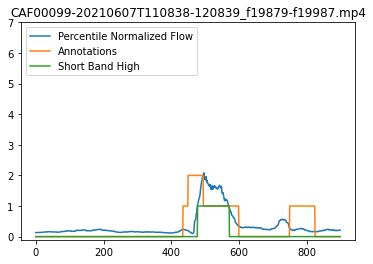

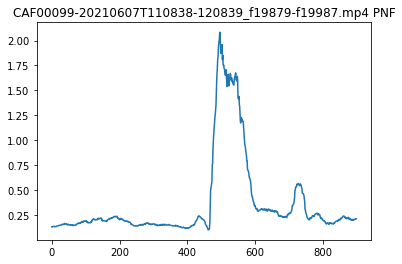

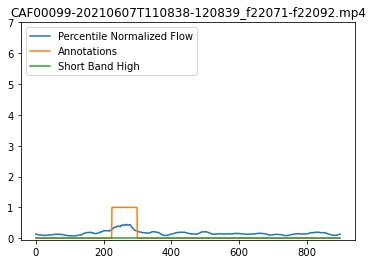

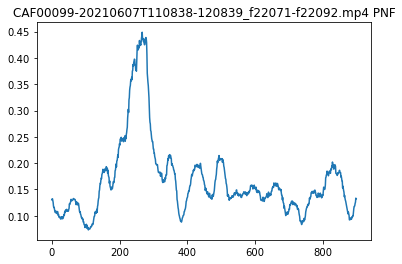

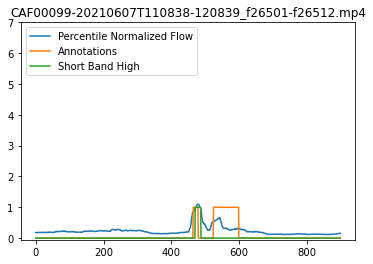

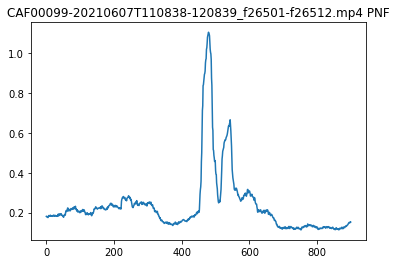

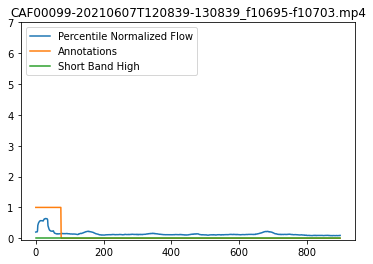

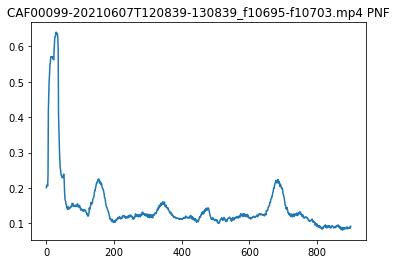

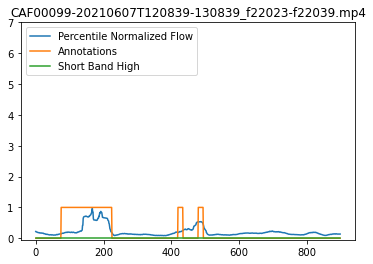

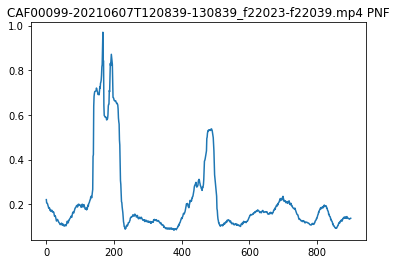

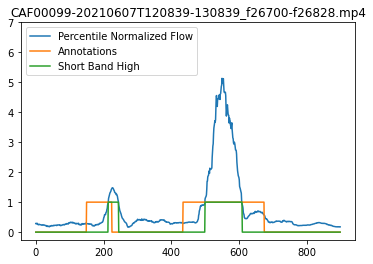

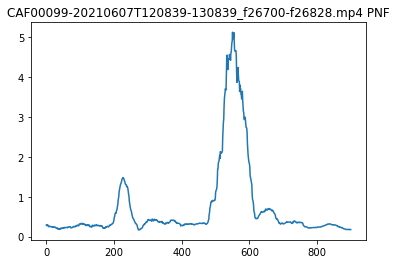

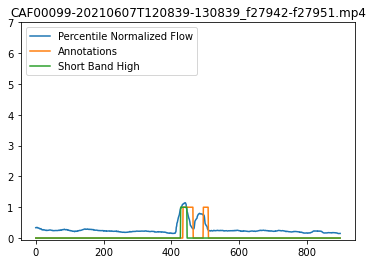

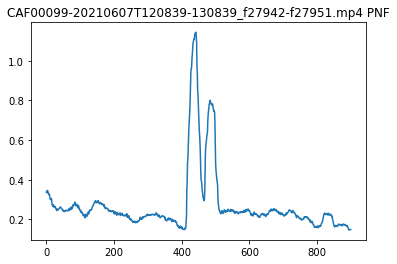

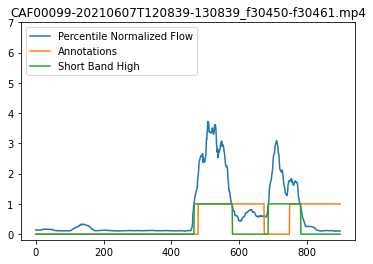

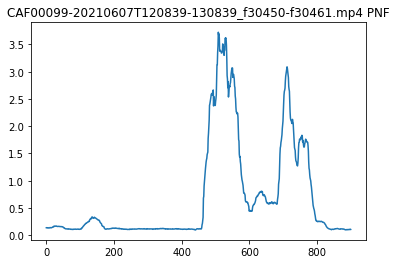

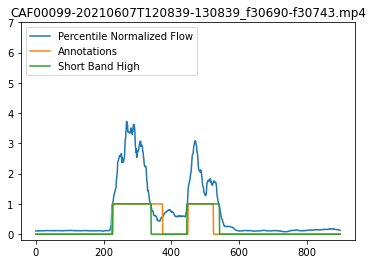

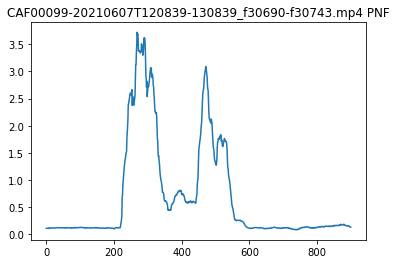

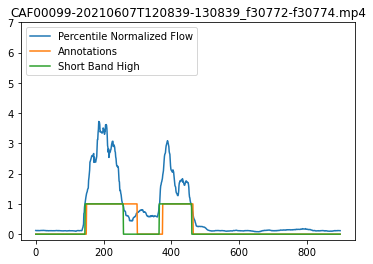

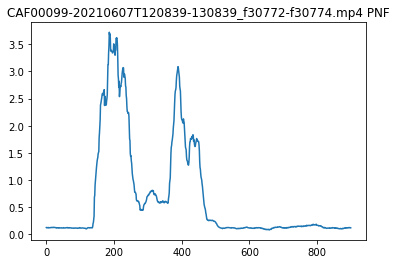

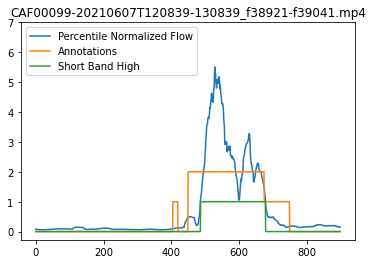

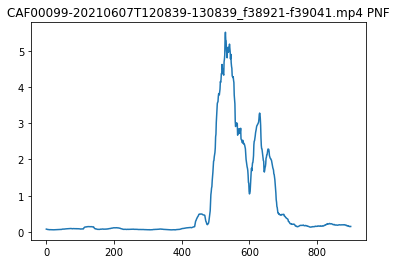

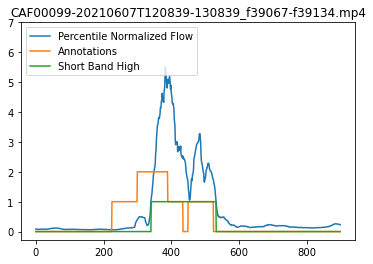

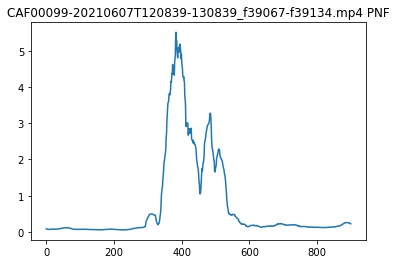

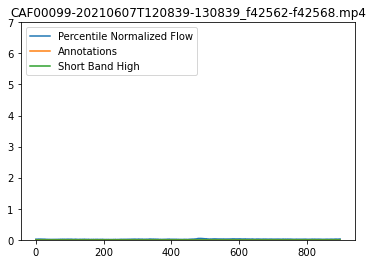

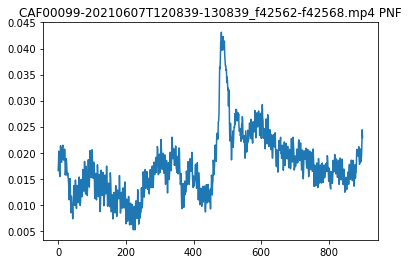

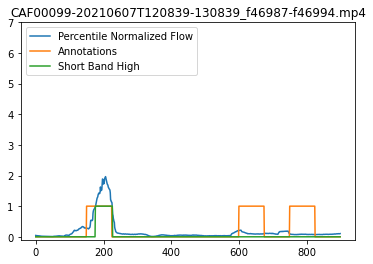

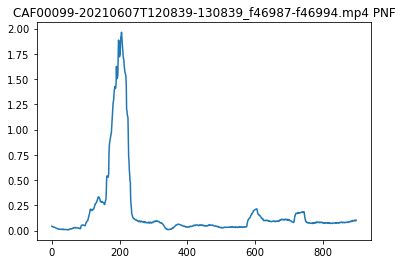

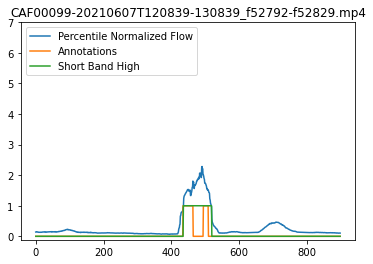

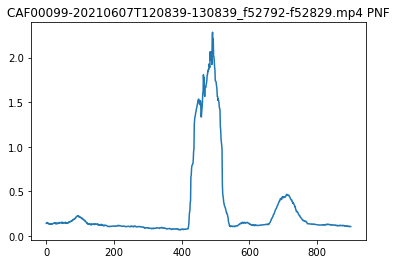

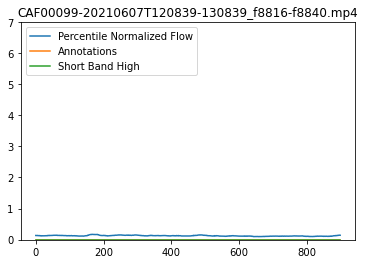

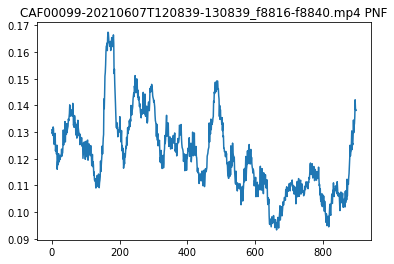

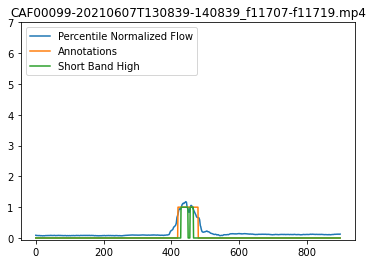

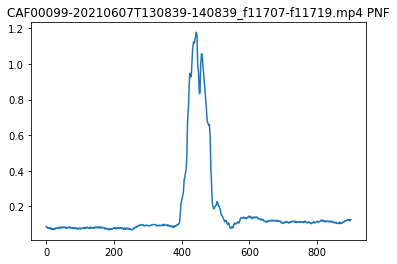

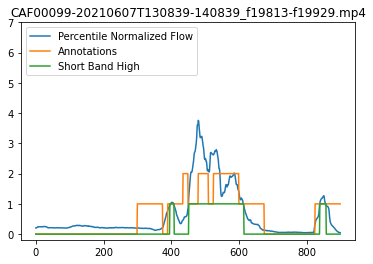

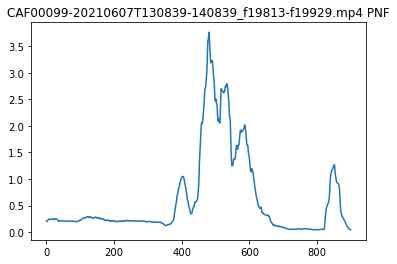

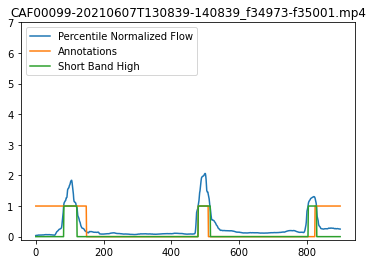

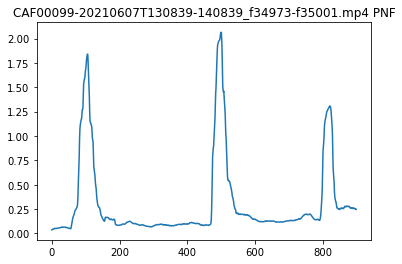

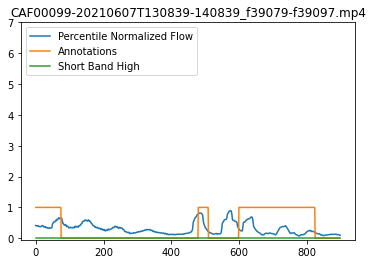

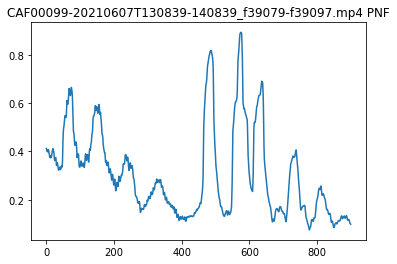

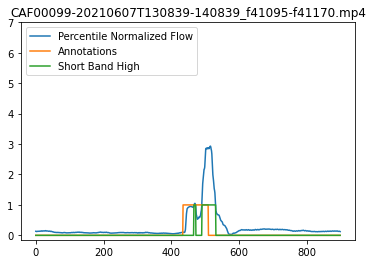

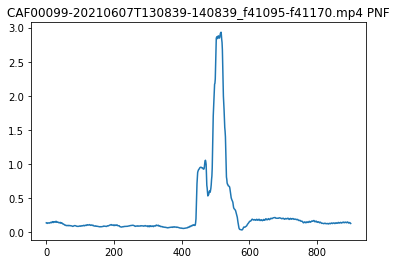

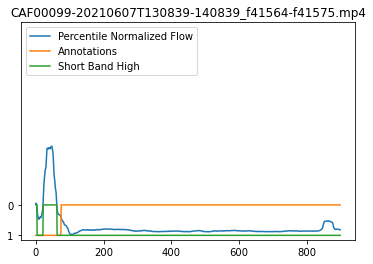

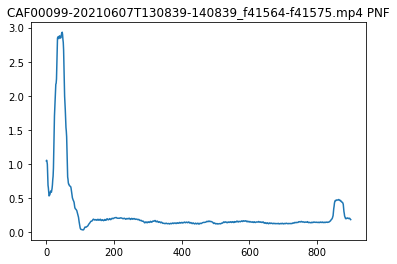

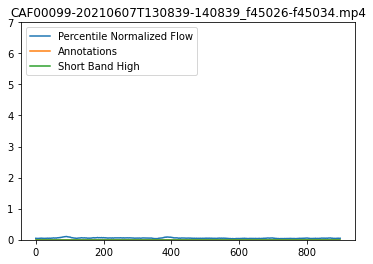

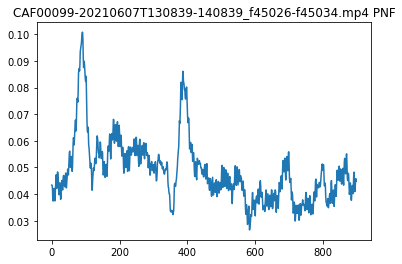

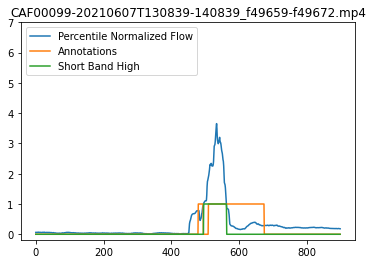

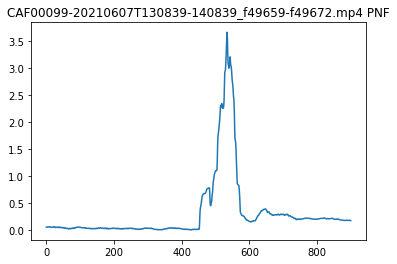

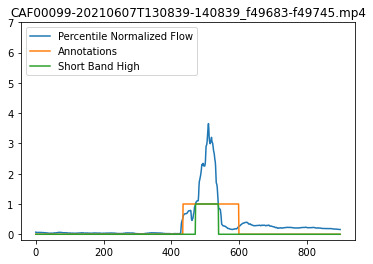

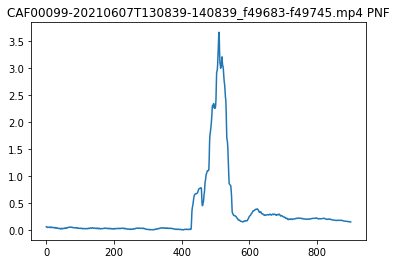

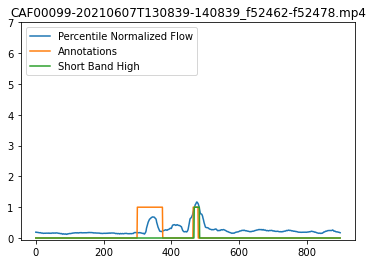

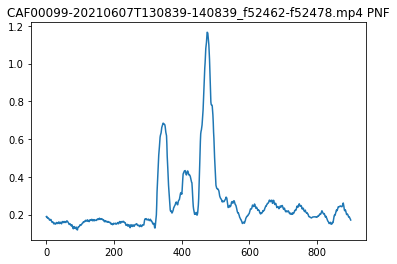

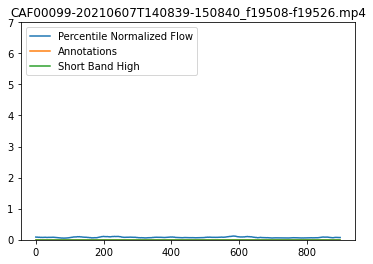

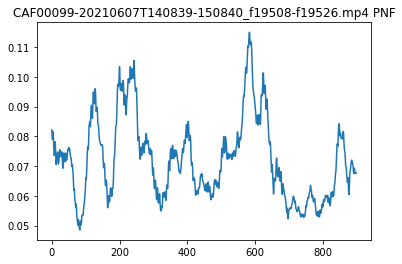

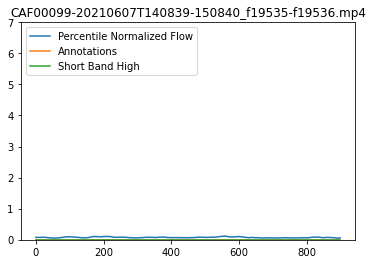

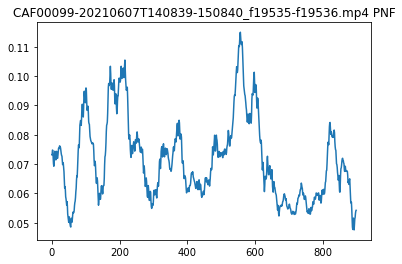

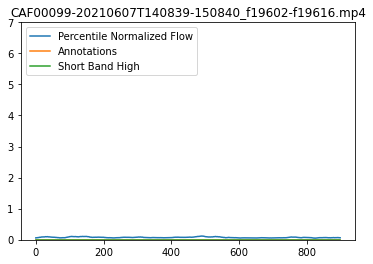

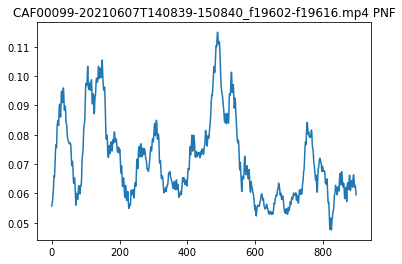

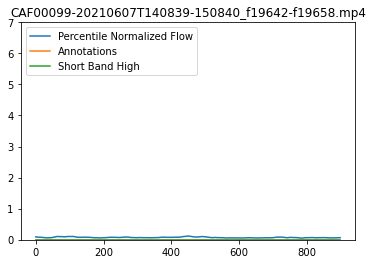

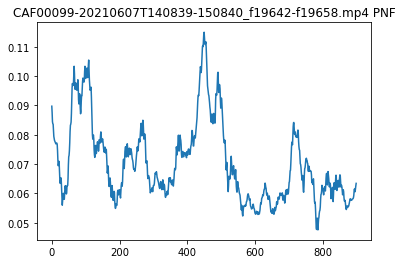

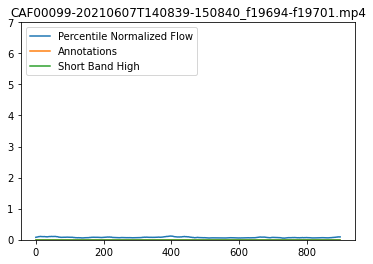

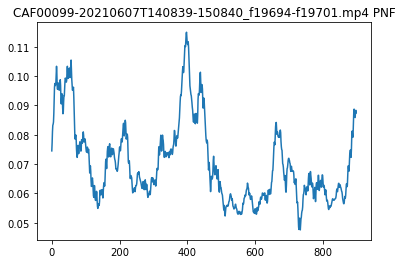

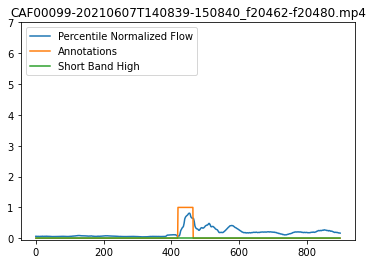

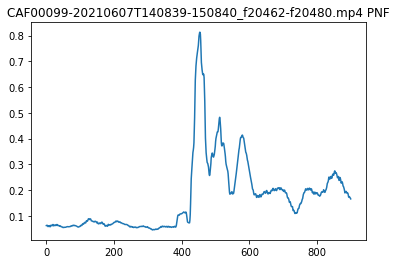

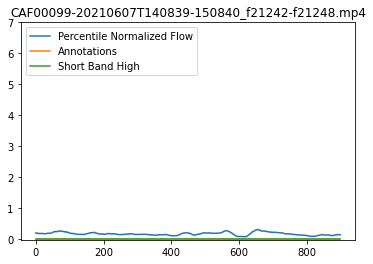

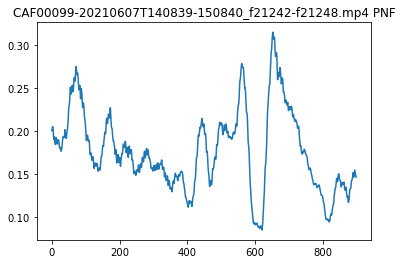

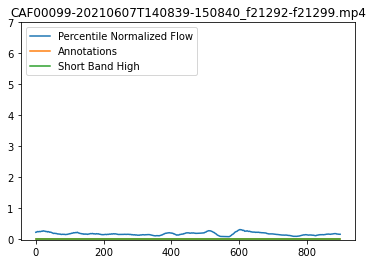

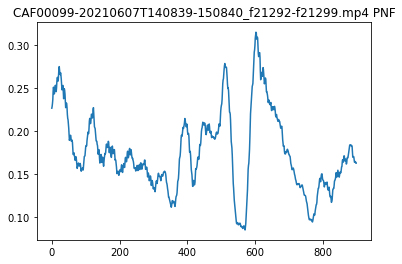

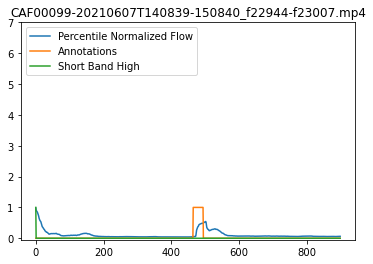

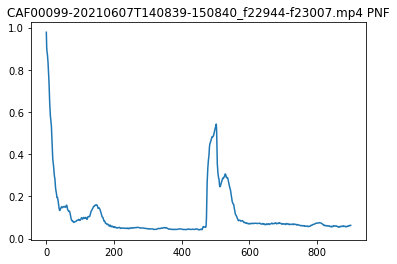

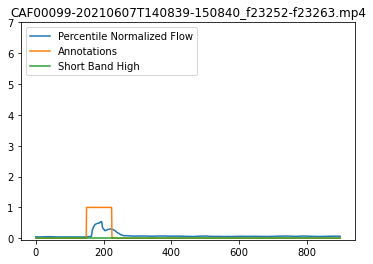

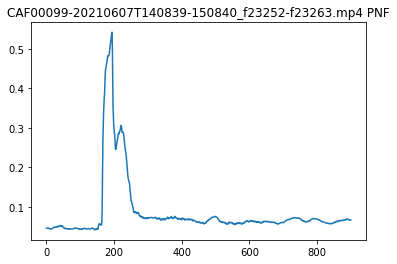

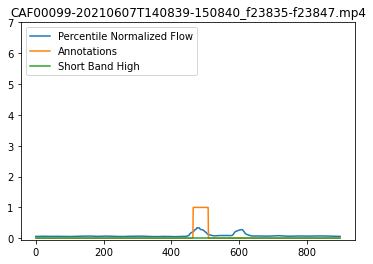

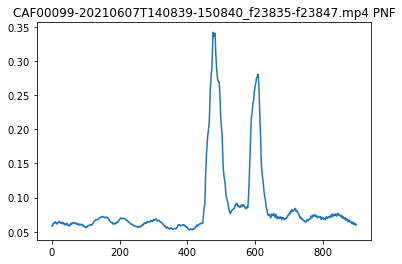

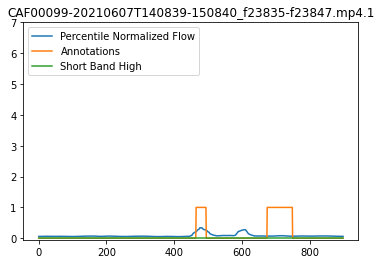

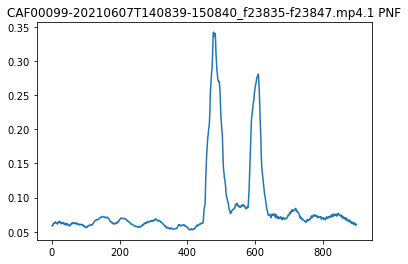

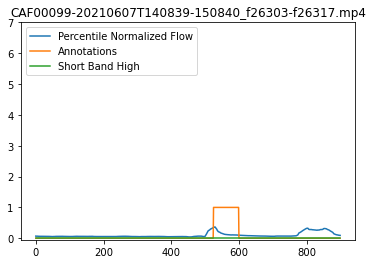

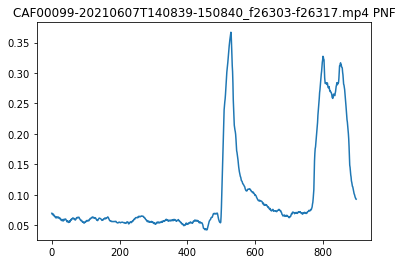

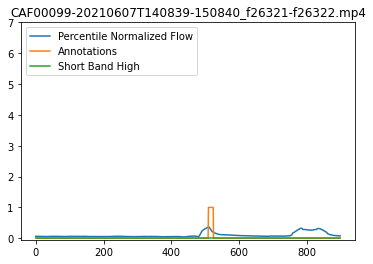

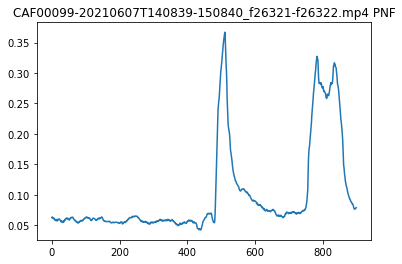

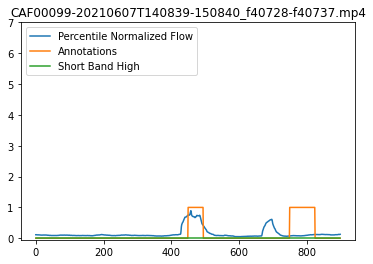

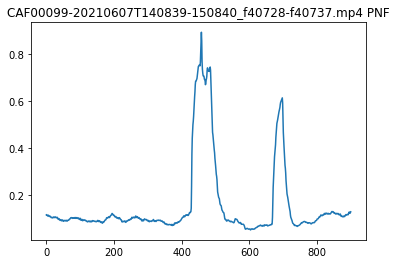

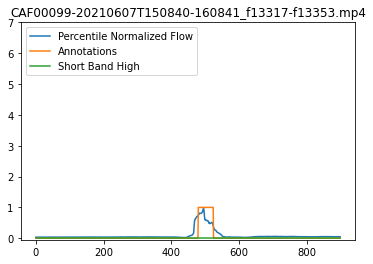

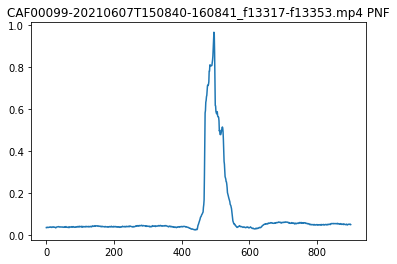

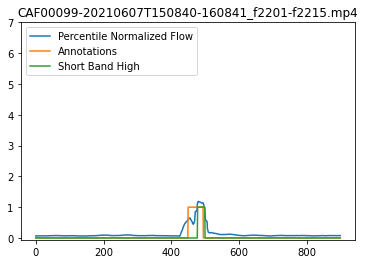

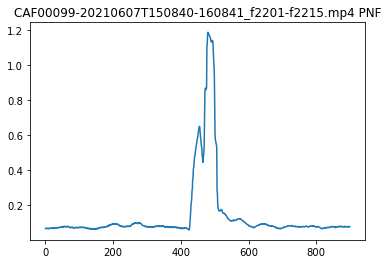

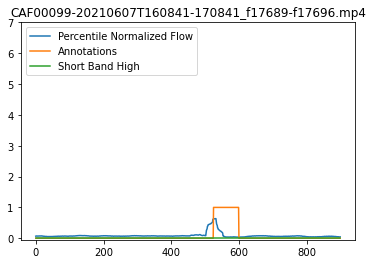

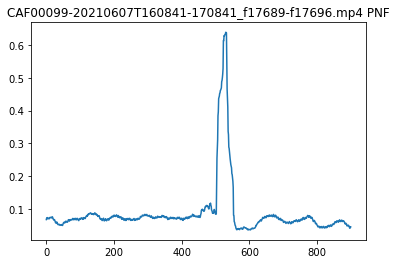

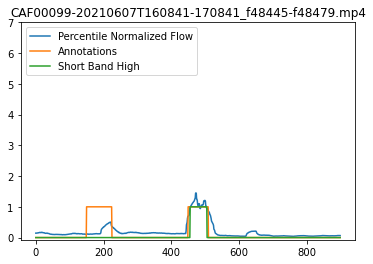

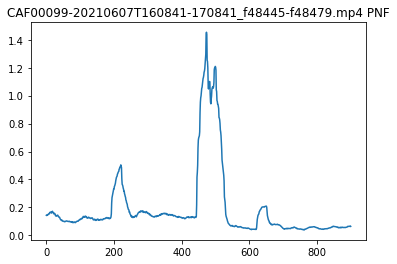

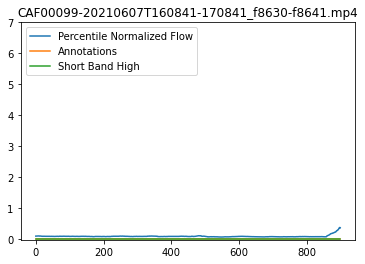

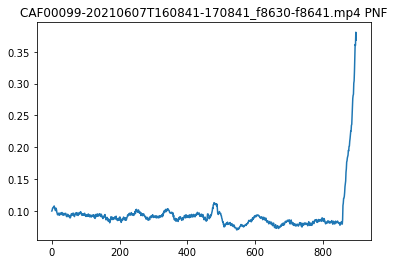

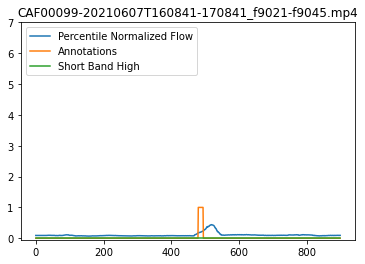

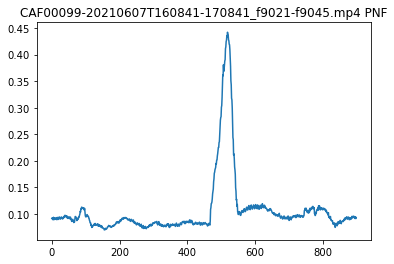

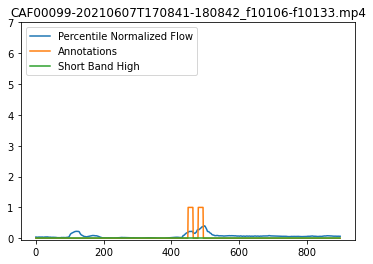

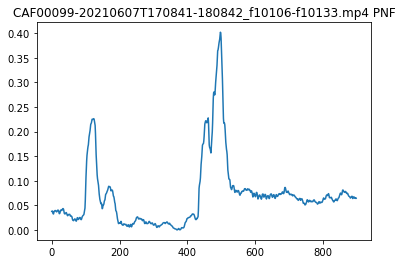

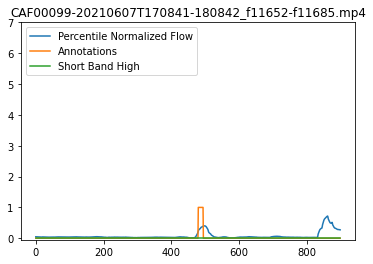

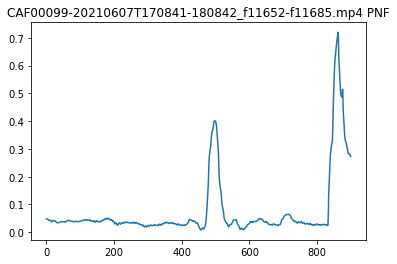

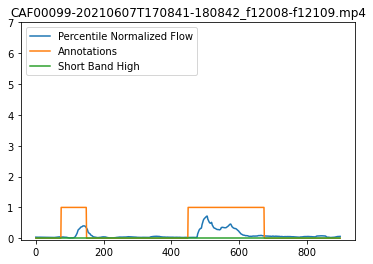

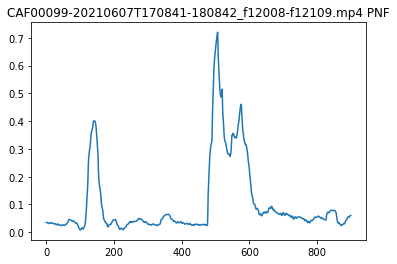

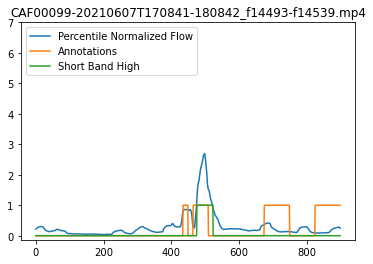

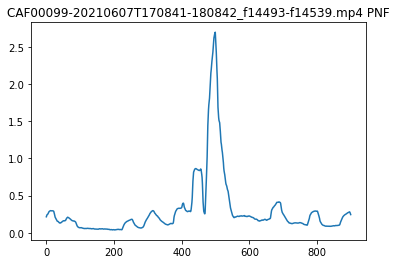

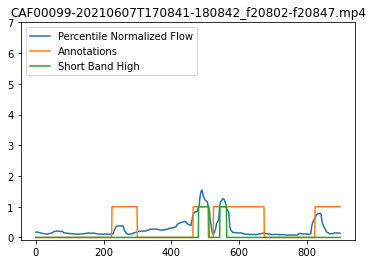

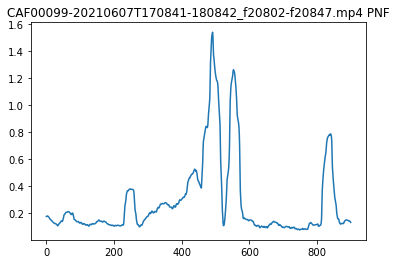

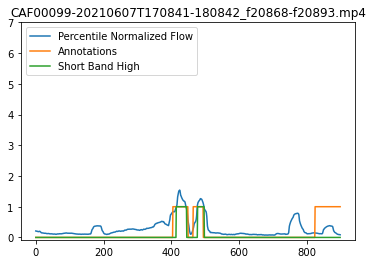

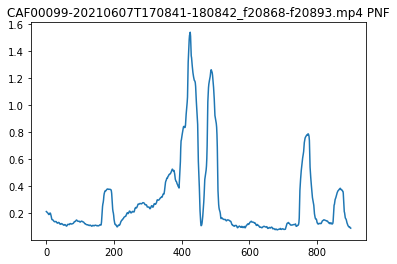

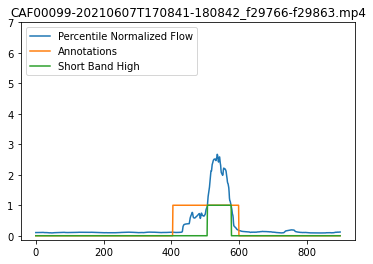

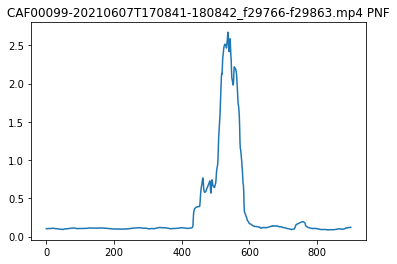

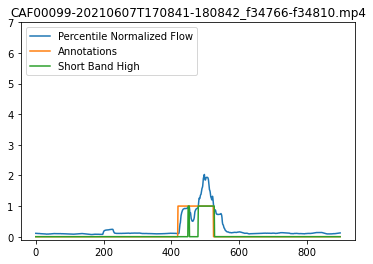

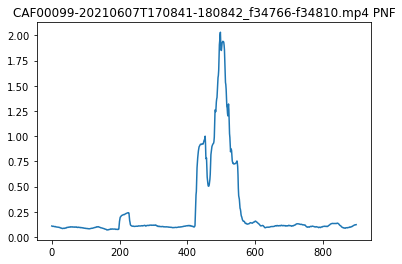

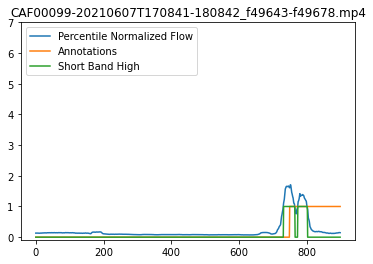

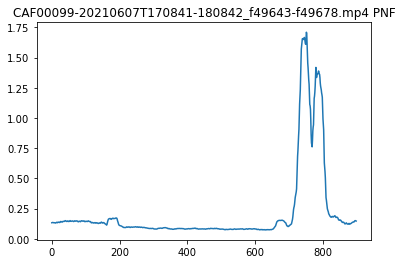

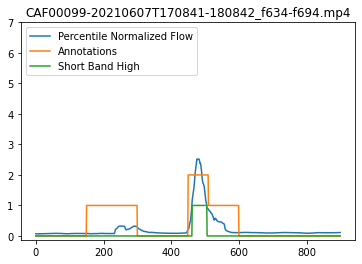

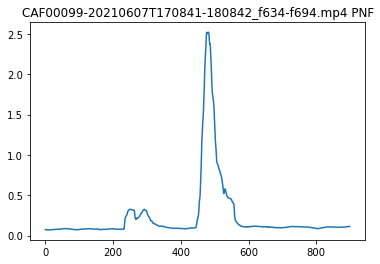

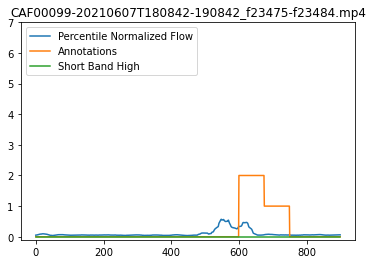

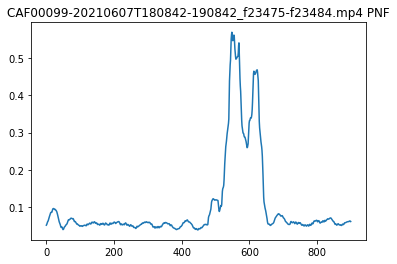

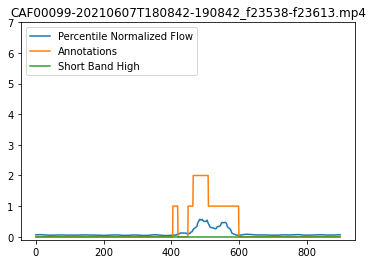

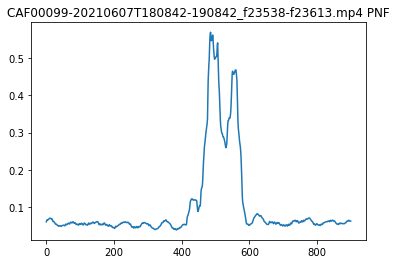

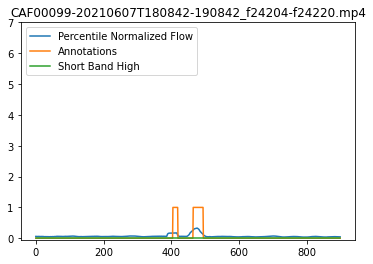

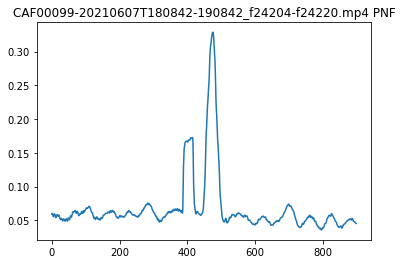

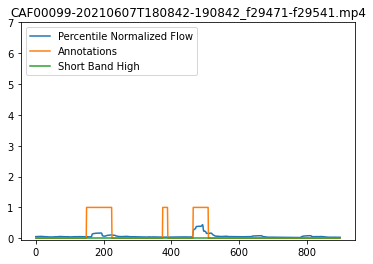

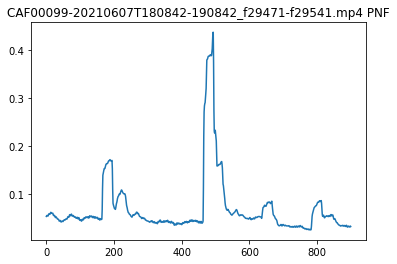

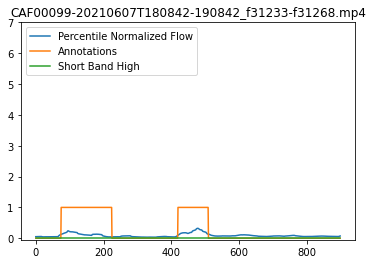

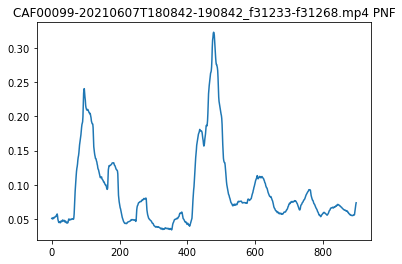

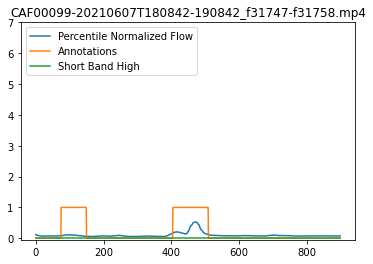

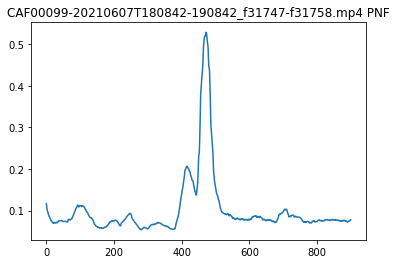

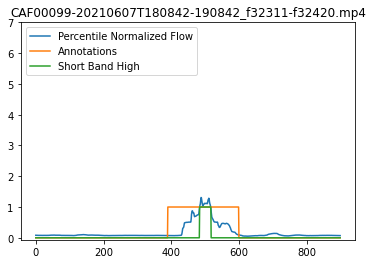

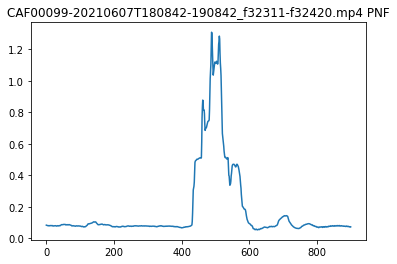

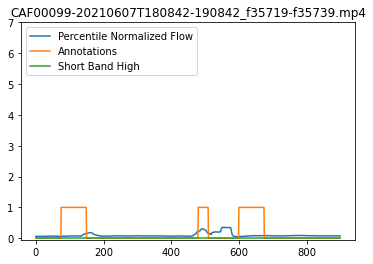

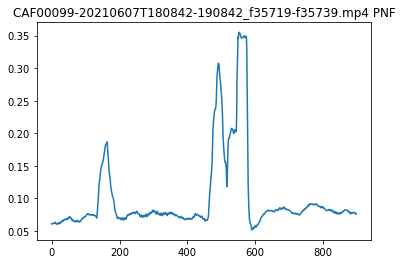

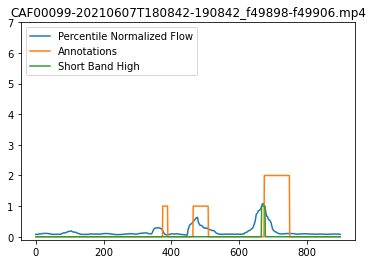

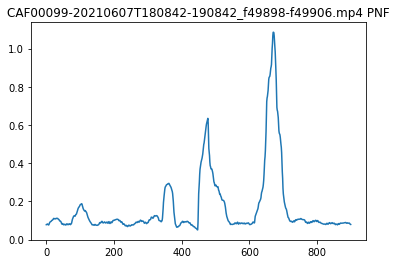

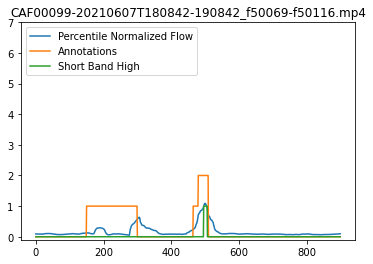

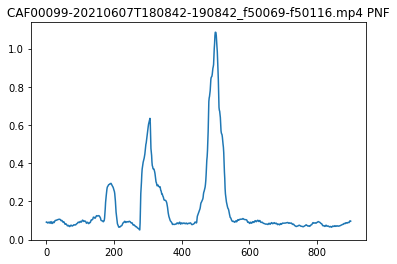

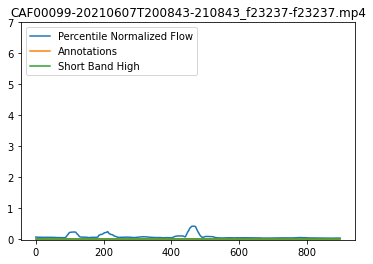

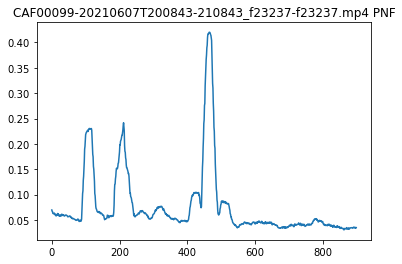

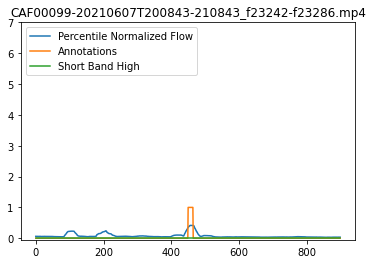

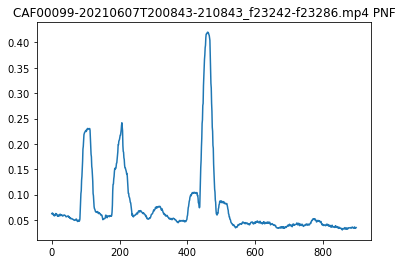

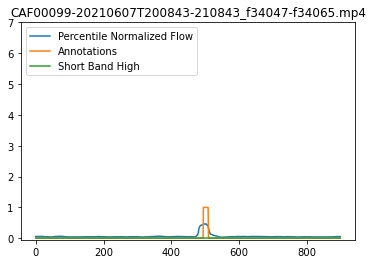

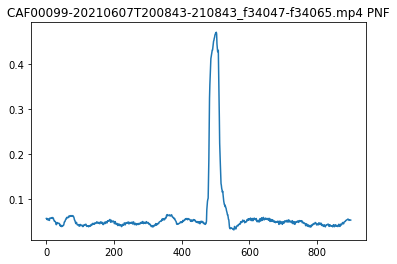

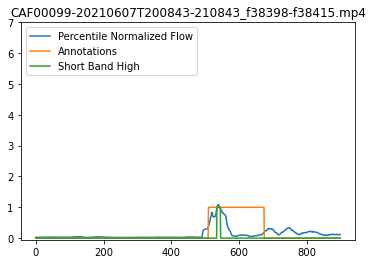

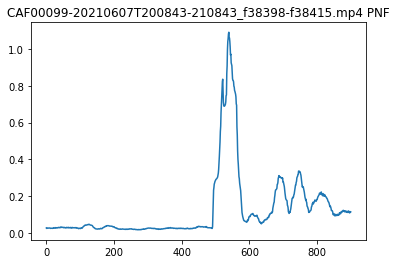

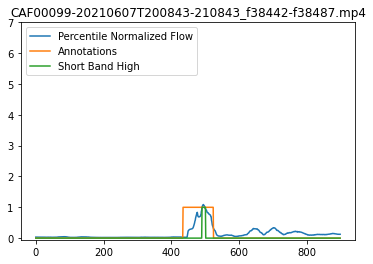

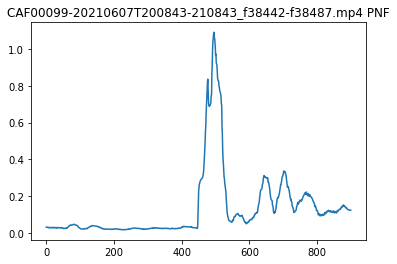

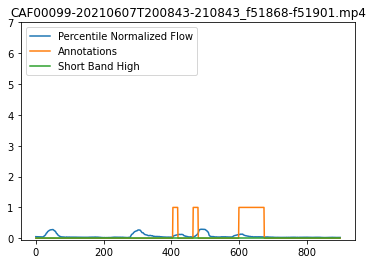

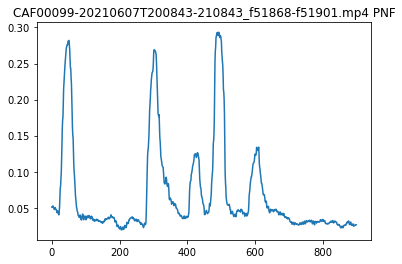

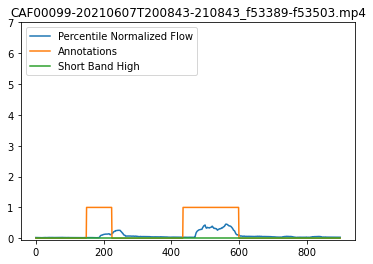

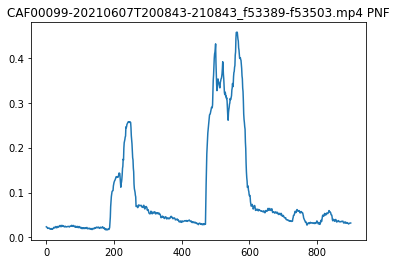

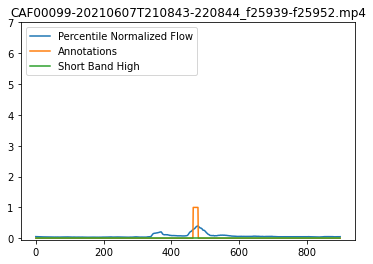

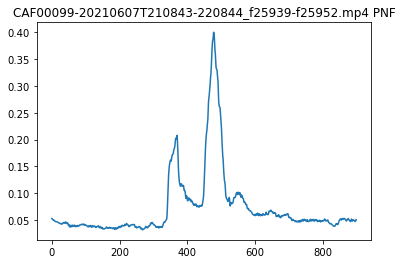

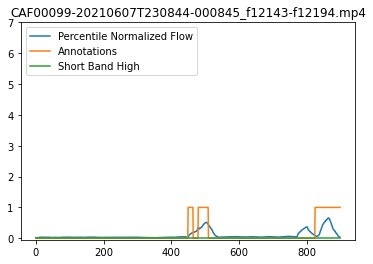

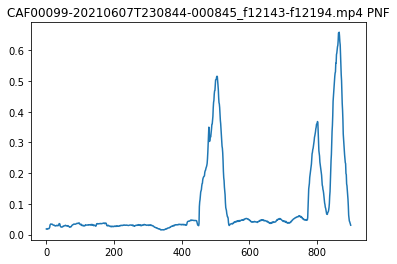

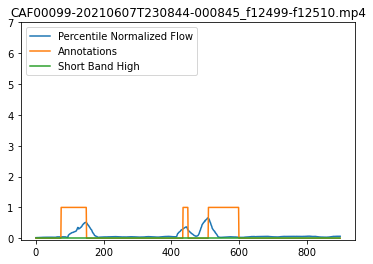

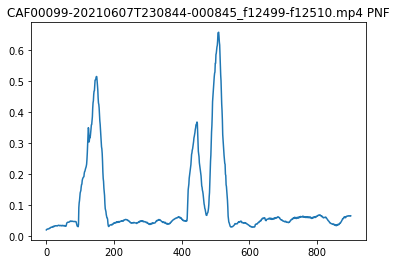

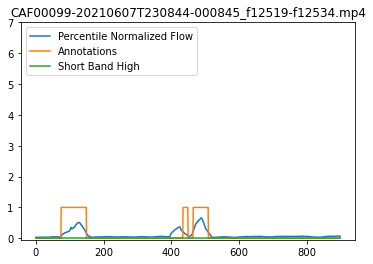

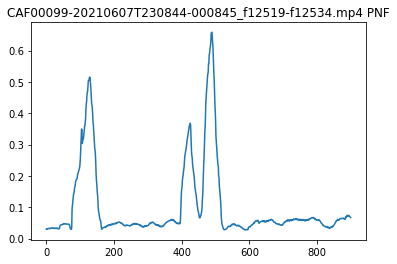

KeyboardInterrupt: 

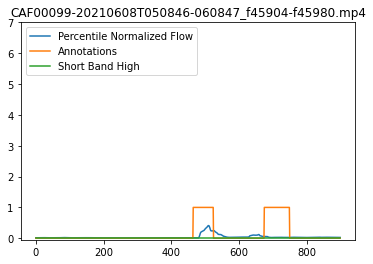

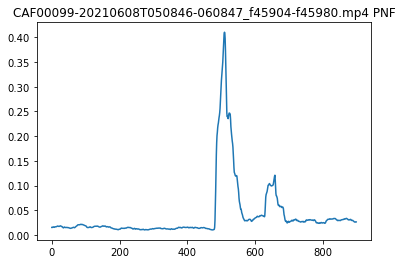

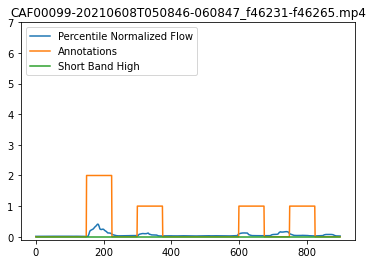

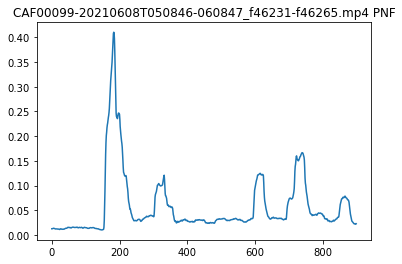

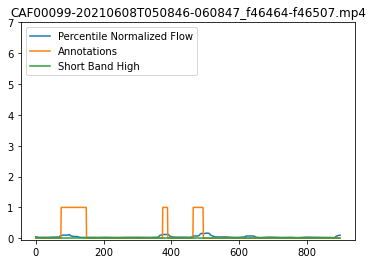

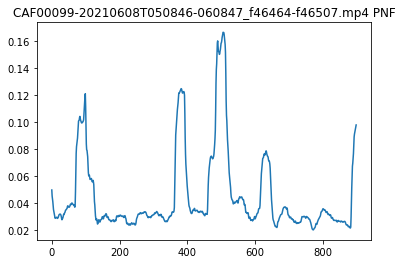

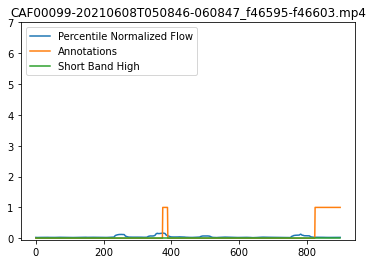

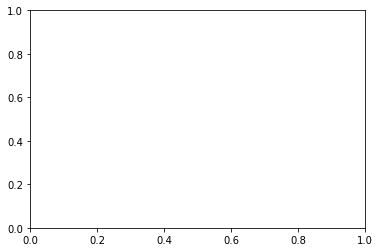

In [1139]:
for i, unique_video in enumerate(np.unique(video_names)):
    flow, ant, shortb, videos = combo_antof(of99_df, ant99_df, unique_video)
    
    for j in range(len(flow)):
        x = range(len(flow[j]))
        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.plot(x, ant[j], label = "Annotations")
        plt.plot(x, shortb[j], label = "Short Band High ")
        plt.title(videos[j])
        ax = plt.gca()
        ax.set_ylim(top = 7)
        plt.legend(loc="upper left")
        
        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.title(videos[j] + " PNF")
    plt.show()

### Sensitivity + Specificity

In [1347]:
#used later for sensitivity
videos_ant = []
videos_shortb = []

In [1348]:
#combine hour long video flickers into one array w/ 2 categorized to be same as 1
def flatten_flickers(video_name, of_df, ant_df):
    __, ant, shortb, __ = combo_antof(of_df, ant_df, video_name)
    
    video_ant = []
    video_shortb = []
    
    for j in range(len(ant)):
        ant[j] = [float(1) if x==float(2) else x for x in ant[j]]
        
        video_ant.extend(ant[j])
        video_shortb.extend(shortb[j])
    return video_ant, video_shortb

In [1349]:
def binary_flickers(video_name, of_df, ant_df):
    __, ant, shortb, ind_videos = combo_antof(of_df, ant_df, video_name)
    
    for j in range(len(ant)):
        ant[j] = [float(1) if x==float(2) else x for x in ant[j]]
    
    return ant, shortb, ind_videos

In [1350]:
#correlation between annotations + short band
for i, unique_video in enumerate(np.unique(video_names)):
    video_ant, video_shortb = flatten_flickers(unique_video, of99_df, ant99_df)
    
    videos_ant.extend(video_ant)
    videos_shortb.extend(video_shortb)
    
    print(unique_video)
    print(stats.pearsonr(np.asarray(video_ant).astype(float),np.asarray(video_shortb).astype(float)))
print(stats.pearsonr(np.asarray(videos_ant).astype(float),np.asarray(videos_shortb).astype(float)))

CAF00099-20210607T110838-120839
(0.4511071751726296, 1.709200858653569e-135)
CAF00099-20210607T120839-130839
(0.579505291143943, 0.0)
CAF00099-20210607T130839-140839
(0.4682382950398427, 0.0)
CAF00099-20210607T140839-150840
(-0.001705413568009632, 0.8429410482722802)
CAF00099-20210607T150840-160841
(0.3688698004483868, 4.005027620963899e-59)
CAF00099-20210607T160841-170841
(0.45963855977692303, 1.0901967191757759e-187)
CAF00099-20210607T170841-180842
(0.36466871299930137, 3.5339809272884456e-281)
CAF00099-20210607T180842-190842
(0.1386230400952677, 7.387563409349639e-40)
CAF00099-20210607T200843-210843
(0.17759140349255895, 8.392079184831435e-46)
CAF00099-20210607T210843-220844
(nan, nan)
CAF00099-20210607T230844-000845
(nan, nan)
CAF00099-20210608T050846-060847
(nan, nan)
CAF00099-20210608T070848-080848
(0.1930980520004414, 8.778351420649062e-84)
CAF00099-20210608T090848-100849
(0.33725165181783606, 2.2178423483729052e-167)
(0.36789349116994574, 0.0)


In [1083]:
#sensitivity test
videos_ant = np.asarray(videos_ant).astype(float)
videos_shortb = np.asarray(videos_shortb).astype(float)

In [1084]:
#only works for np arrays
def sens_calc(ant, shortb):
    ant = np.where(ant == 0.0, -1.0, ant)
    return (np.count_nonzero(np.equal(ant, shortb)))/np.sum(ant > 0)

In [1090]:
#works with np or lists
def verify_sens(ant, shortb):
    length = len(ant)
    sens = np.zeros(length)
    
    for i in range(length):
        if ant[i] == 1 and ant[i] == shortb[i]:
            sens[i] = 1
    
    if (np.count_nonzero(ant) == 0):
        return -1.0
    return (np.count_nonzero(sens))/np.count_nonzero(ant)

In [1204]:
#sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, of99_df, ant99_df)
    print(sens_calc(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))
print(verify_sens(videos_ant, videos_shortb))

0.254320987654321
0.48104575163398694
0.3027027027027027
0.0
0.18888888888888888
0.2222222222222222
0.18888888888888888
0.029357798165137616
0.03492063492063492
0.0
0.0
0.0
0.056022408963585436
0.19633699633699633
0.18933333333333333


In [1206]:
#sensitivity for individual flickers
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, of99_df, ant99_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        print(verify_sens(flicker_ant[k], flicker_shortb[k]))

CAF00099-20210607T110838-120839_f19879-f19987.mp4
0.39166666666666666
CAF00099-20210607T110838-120839_f22071-f22092.mp4
0.0
CAF00099-20210607T110838-120839_f26501-f26512.mp4
0.1
CAF00099-20210607T120839-130839_f10695-f10703.mp4
0.0
CAF00099-20210607T120839-130839_f22023-f22039.mp4
0.0
CAF00099-20210607T120839-130839_f26700-f26828.mp4
0.38412698412698415
CAF00099-20210607T120839-130839_f27942-f27951.mp4
0.26666666666666666
CAF00099-20210607T120839-130839_f30450-f30461.mp4
0.3884057971014493
CAF00099-20210607T120839-130839_f30690-f30743.mp4
0.8355555555555556
CAF00099-20210607T120839-130839_f30772-f30774.mp4
0.8125
CAF00099-20210607T120839-130839_f38921-f39041.mp4
0.6095238095238096
CAF00099-20210607T120839-130839_f39067-f39134.mp4
0.5929824561403508
CAF00099-20210607T120839-130839_f42562-f42568.mp4
-1.0
CAF00099-20210607T120839-130839_f46987-f46994.mp4
0.21777777777777776
CAF00099-20210607T120839-130839_f52792-f52829.mp4
0.9777777777777777
CAF00099-20210607T120839-130839_f8816-f8840.mp4

In [1088]:
#finds groups + returns their indexes in given array
from itertools import groupby
from collections import defaultdict

def find_groups(arr):
    i = 0
    result = defaultdict(list)
    for k, g in groupby(arr):
        elems = len(list(g))
        result[k].append((i, i+elems-1))
        i += elems
    
    return result

In [1106]:
#sensitivity based on there being at least one 1 in interval 
def overlap_sens(ant, shortb):
    group_ones = find_groups(ant).get(1)

    overlap = np.zeros(len(ant))
    
    if(group_ones != None):
        for idx in range(len(group_ones)):
            start_idx = group_ones[idx][0]
            end_idx = group_ones[idx][1]
            if 1 in shortb[start_idx : end_idx]:
                overlap[start_idx : end_idx] = 1
    else:
        return None
    
#     return overlap
    return (np.count_nonzero(overlap))/np.count_nonzero(ant)

In [1207]:
#overlap sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, of99_df, ant99_df)
    print(overlap_sens(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))
print(overlap_sens(videos_ant, videos_shortb))

0.43950617283950616
0.803921568627451
0.7417417417417418
0.0
0.4888888888888889
0.26222222222222225
0.5033333333333333
0.2
0.4015873015873016
0.0
0.0
0.0
0.20840336134453782
0.5663003663003663
0.44385185185185183


In [1208]:
#overlap sensitivity for individual flickers
values = []
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, of99_df, ant99_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        sens = overlap_sens(flicker_ant[k], flicker_shortb[k])
        print(sens)
        values.append(sens)

CAF00099-20210607T110838-120839_f19879-f19987.mp4
0.6833333333333333
CAF00099-20210607T110838-120839_f22071-f22092.mp4
0.0
CAF00099-20210607T110838-120839_f26501-f26512.mp4
0.15555555555555556
CAF00099-20210607T120839-130839_f10695-f10703.mp4
0.0
CAF00099-20210607T120839-130839_f22023-f22039.mp4
0.0
CAF00099-20210607T120839-130839_f26700-f26828.mp4
0.9936507936507937
CAF00099-20210607T120839-130839_f27942-f27951.mp4
0.6444444444444445
CAF00099-20210607T120839-130839_f30450-f30461.mp4
0.9942028985507246
CAF00099-20210607T120839-130839_f30690-f30743.mp4
0.9911111111111112
CAF00099-20210607T120839-130839_f30772-f30774.mp4
0.9916666666666667
CAF00099-20210607T120839-130839_f38921-f39041.mp4
0.9492063492063492
CAF00099-20210607T120839-130839_f39067-f39134.mp4
0.9929824561403509
CAF00099-20210607T120839-130839_f42562-f42568.mp4
None
CAF00099-20210607T120839-130839_f46987-f46994.mp4
0.3288888888888889
CAF00099-20210607T120839-130839_f52792-f52829.mp4
0.9555555555555556
CAF00099-20210607T12083

In [936]:
#specificity
def spec_calc(ant, shortb):
    ant_zero = set()
    shortb_zero = set()
    
    for i in range(len(ant)):
        if ant[i] == 0:
            ant_zero.add(i)
        if shortb[i] == 0:
            shortb_zero.add(i)
            
    return len(ant_zero.intersection(shortb_zero))/len(ant)

In [1209]:
#specificity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, of99_df, ant99_df)
    print(spec_calc(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))
print(spec_calc(videos_ant, videos_shortb))

0.847037037037037
0.7865811965811966
0.8076666666666666
0.9621481481481482
0.9472222222222222
0.9375
0.7955555555555556
0.8174444444444444
0.9
0.9833333333333333
0.8388888888888889
0.8208333333333333
0.8180808080808081
0.773015873015873
0.8454333333333334


In [1210]:
#specificity for flicker videos
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, of99_df, ant99_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        print(spec_calc(flicker_ant[k], flicker_shortb[k]))

CAF00099-20210607T110838-120839_f19879-f19987.mp4
0.7333333333333333
CAF00099-20210607T110838-120839_f22071-f22092.mp4
0.9166666666666666
CAF00099-20210607T110838-120839_f26501-f26512.mp4
0.8911111111111111
CAF00099-20210607T120839-130839_f10695-f10703.mp4
0.9166666666666666
CAF00099-20210607T120839-130839_f22023-f22039.mp4
0.8
CAF00099-20210607T120839-130839_f26700-f26828.mp4
0.6277777777777778
CAF00099-20210607T120839-130839_f27942-f27951.mp4
0.9422222222222222
CAF00099-20210607T120839-130839_f30450-f30461.mp4
0.5333333333333333
CAF00099-20210607T120839-130839_f30690-f30743.mp4
0.7266666666666667
CAF00099-20210607T120839-130839_f30772-f30774.mp4
0.7177777777777777
CAF00099-20210607T120839-130839_f38921-f39041.mp4
0.65
CAF00099-20210607T120839-130839_f39067-f39134.mp4
0.6577777777777778
CAF00099-20210607T120839-130839_f42562-f42568.mp4
1.0
CAF00099-20210607T120839-130839_f46987-f46994.mp4
0.7477777777777778
CAF00099-20210607T120839-130839_f52792-f52829.mp4
0.9055555555555556
CAF00099-

### Creating New Threshold + Median Filter Parameters

In [1351]:
#median filter on normalized OF
def median_filter(filter_length, video_name):
    ref_df = of_df[of_df['video_filename'] == (video_name) + ".mp4"]
    return scipy.signal.medfilt(ref_df['percentile_normalized_flow'].values, filter_length)

In [1330]:
#is in high activity
def is_in_hact(threshold_value, median_filter):
    is_in = []
    for i in range(len(median_filter)):
        if median_filter[i] >= threshold_value:
            is_in.append(True) 
        else:
            is_in.append(False)
    return is_in

In [1380]:
#consolidate to create new dataframe
comp_names = []
comp_median = []
comp_hact = []

for i, unique_video in enumerate(np.unique(video_names)):
    med_fil = median_filter(5, unique_video)
    is_in = is_in_hact(0.25, med_fil)
    
    comp_median.extend(med_fil)
    comp_hact.extend(is_in)
    arr_names = np.full(shape = len(med_fil), fill_value = unique_video + ".mp4")
    comp_names.extend(arr_names)

adjust_cols = {'video_filename' : comp_names, 'percentile_normalized_flow' : comp_median, 'is_in_short_band_high_activity' : comp_hact}
adjust_df = pd.DataFrame(data=adjust_cols)

In [1334]:
adjust_df

video_filename  percentile_normalized_flow  \
0       CAF00099-20210607T110838-120839.mp4                    0.145220   
1       CAF00099-20210607T110838-120839.mp4                    0.145489   
2       CAF00099-20210607T110838-120839.mp4                    0.145489   
3       CAF00099-20210607T110838-120839.mp4                    0.145220   
4       CAF00099-20210607T110838-120839.mp4                    0.141201   
...                                     ...                         ...   
756119  CAF00099-20210608T090848-100849.mp4                    0.071527   
756120  CAF00099-20210608T090848-100849.mp4                    0.072033   
756121  CAF00099-20210608T090848-100849.mp4                    0.072213   
756122  CAF00099-20210608T090848-100849.mp4                    0.072033   
756123  CAF00099-20210608T090848-100849.mp4                    0.069074   

        is_in_short_band_high_activity  
0                                False  
1                                False  
2                                False  
3                                False  
4                                False  
...                                ...  
756119                           False  
756120                           False  
756121                           False  
756122                           False  
756123                           False  

[756124 rows x 3 columns]

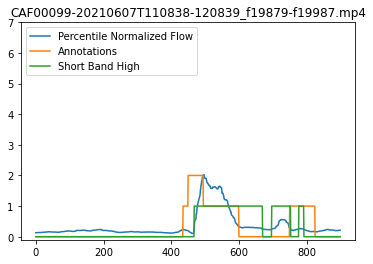

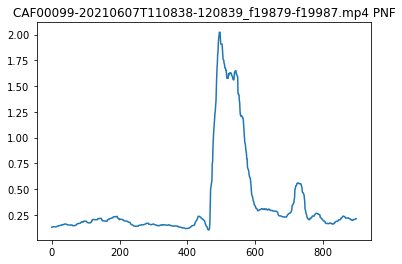

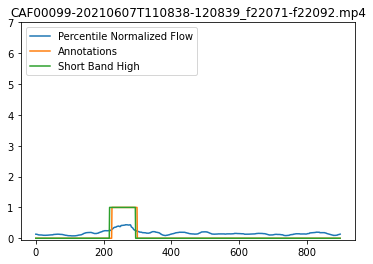

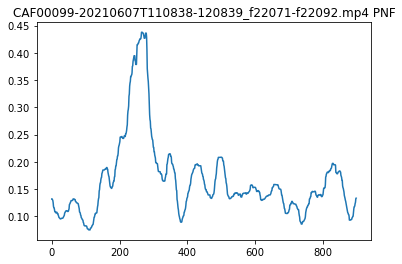

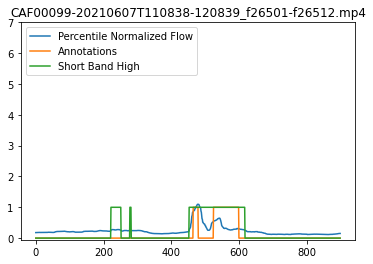

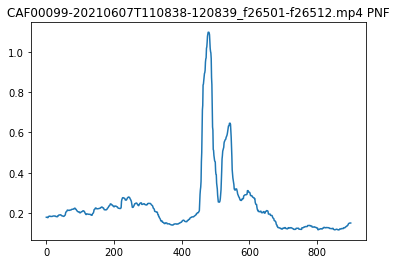

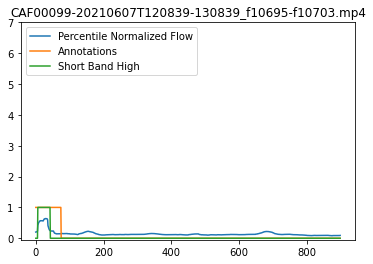

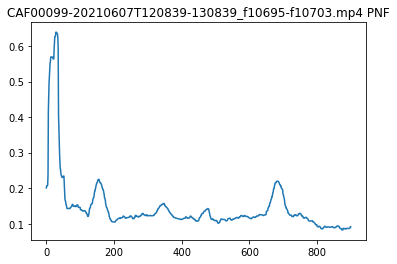

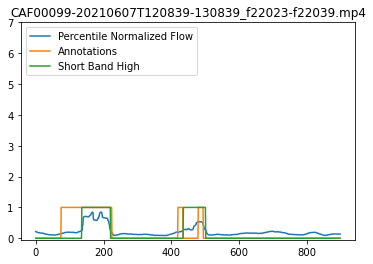

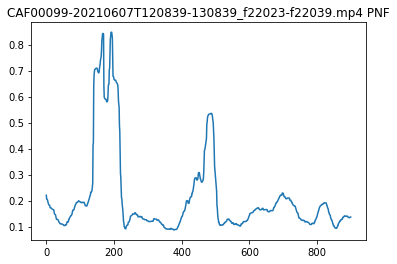

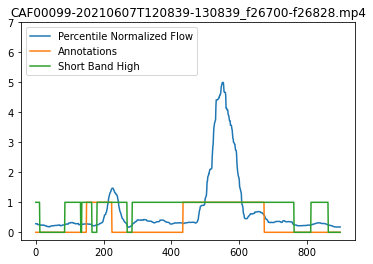

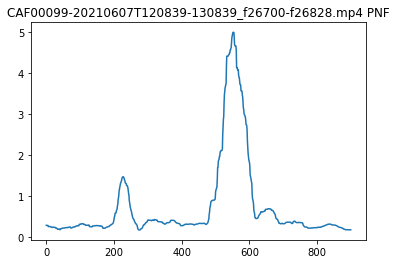

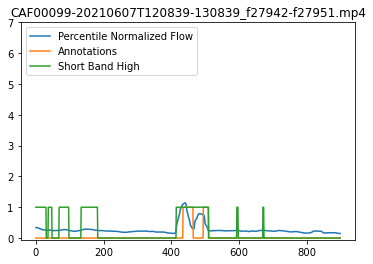

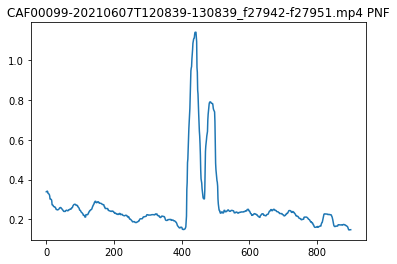

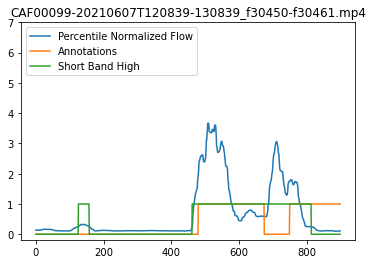

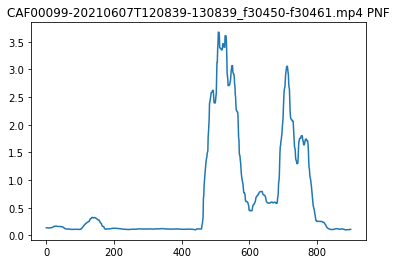

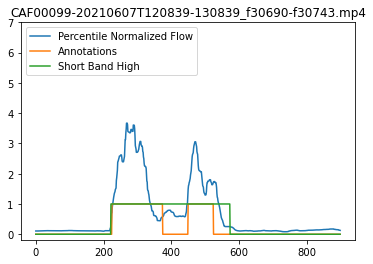

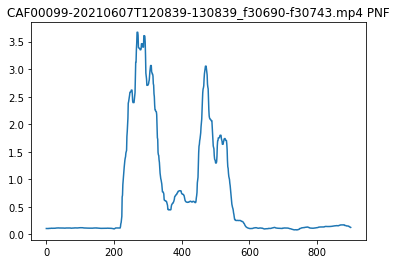

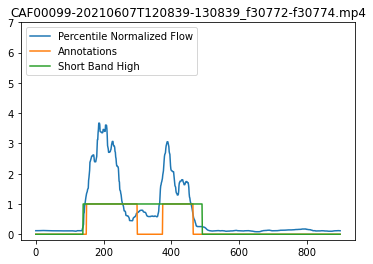

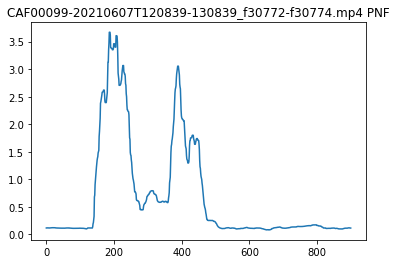

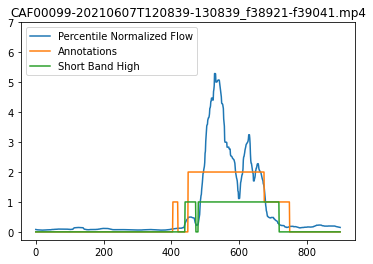

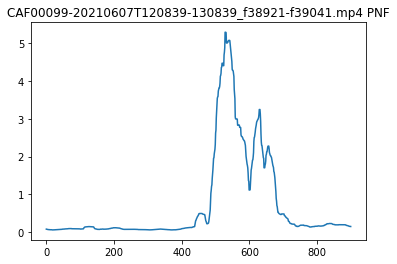

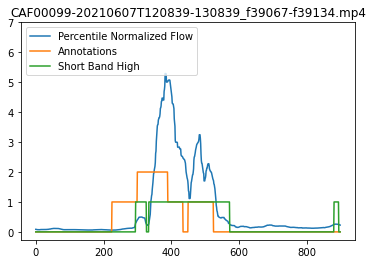

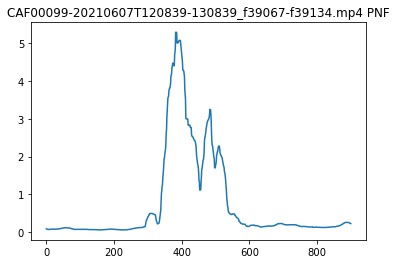

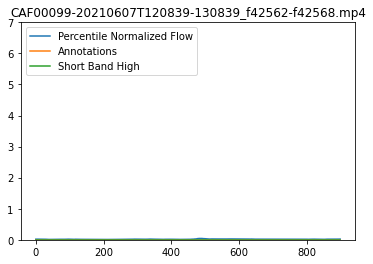

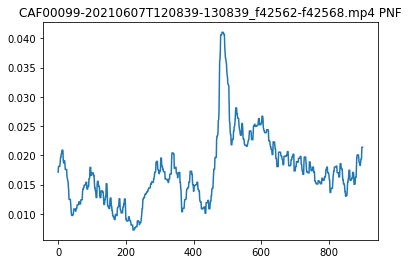

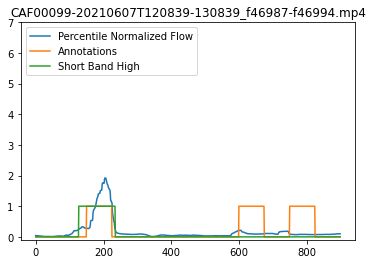

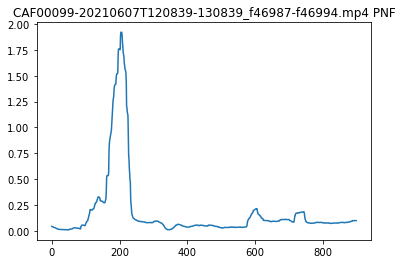

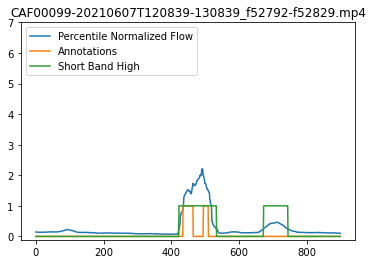

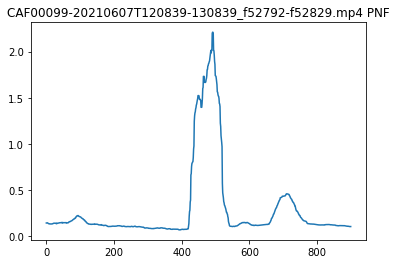

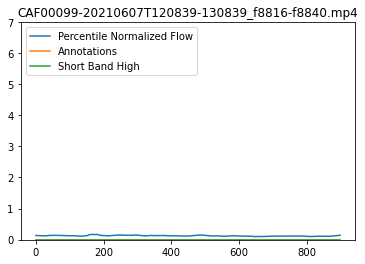

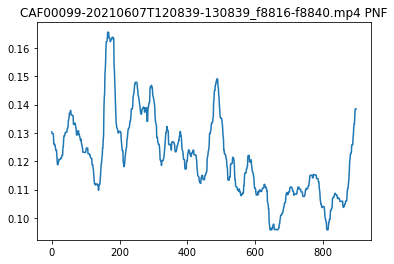

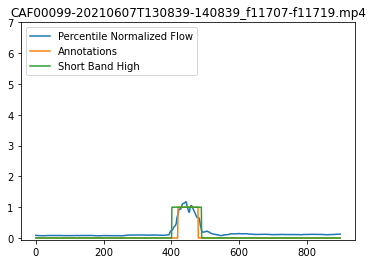

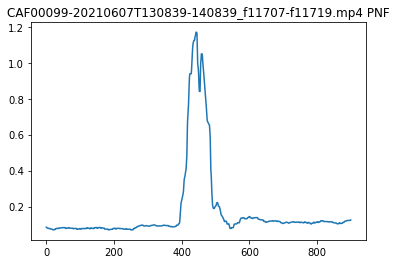

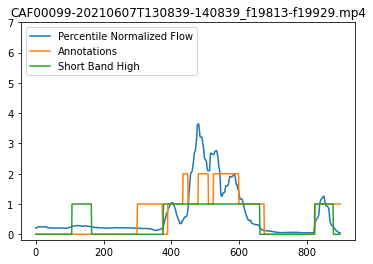

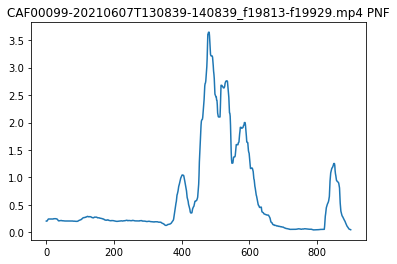

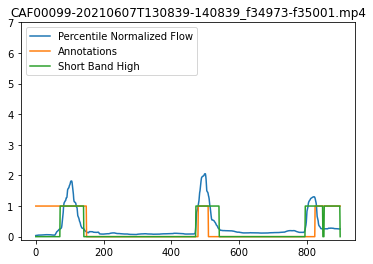

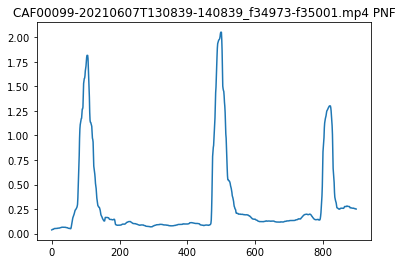

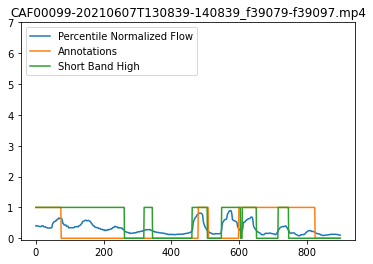

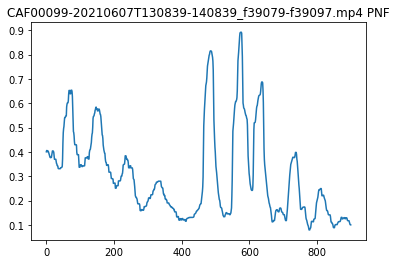

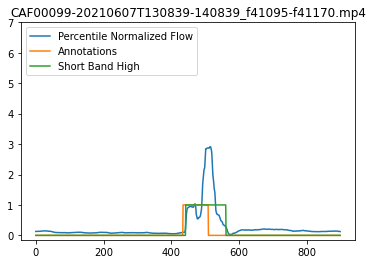

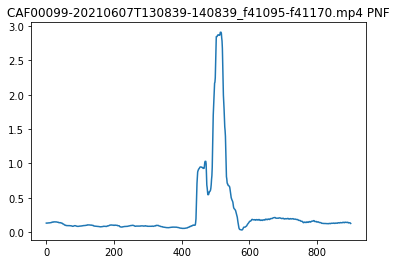

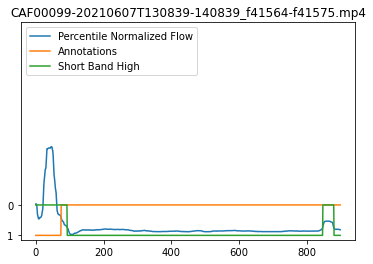

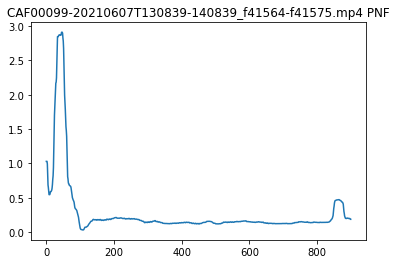

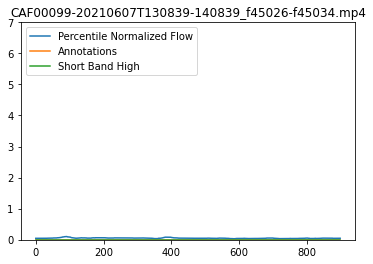

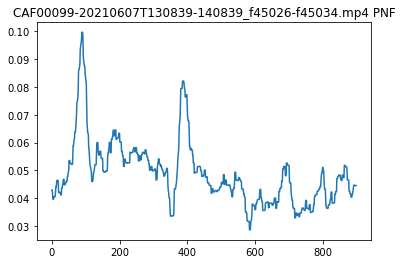

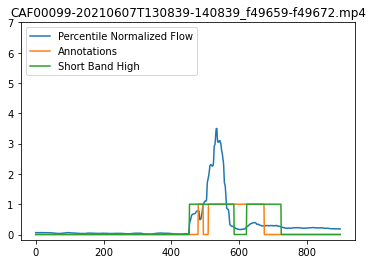

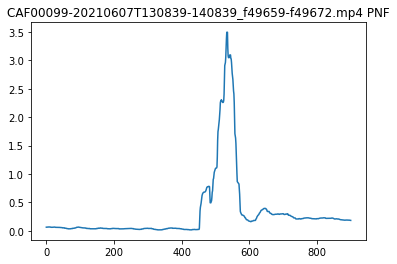

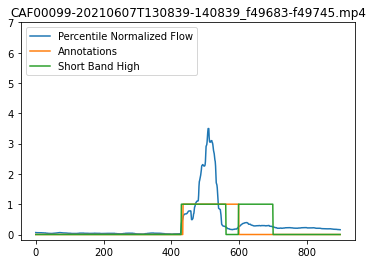

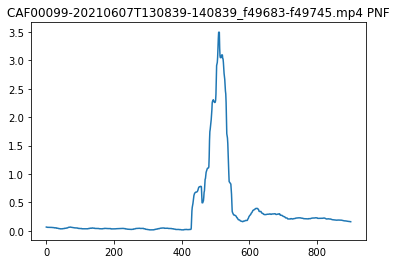

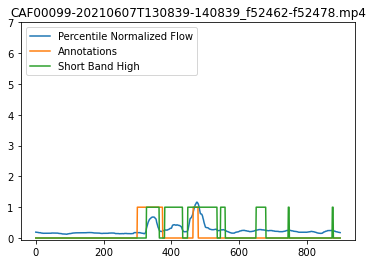

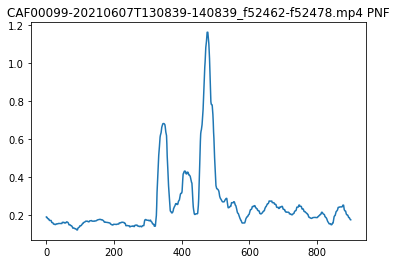

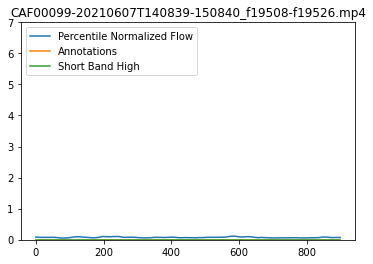

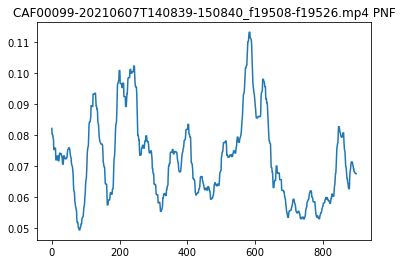

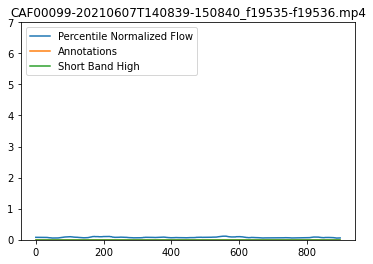

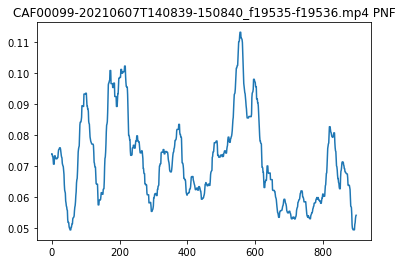

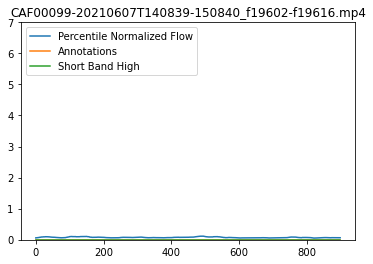

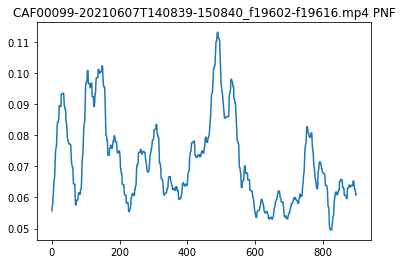

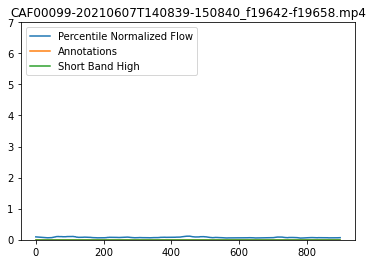

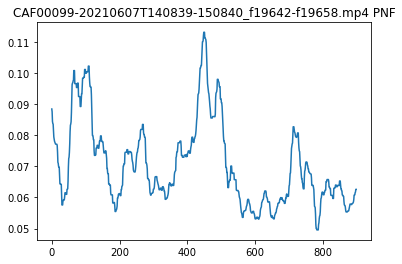

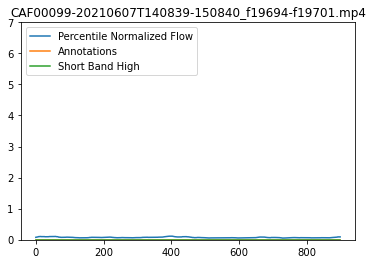

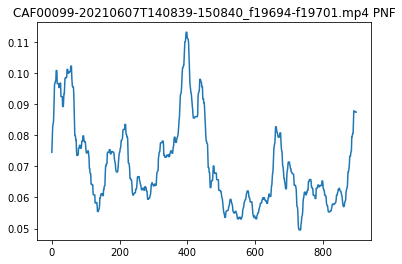

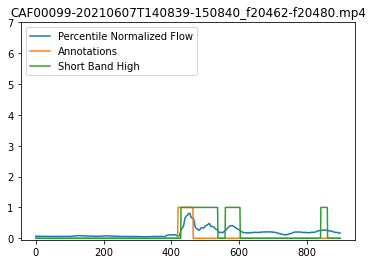

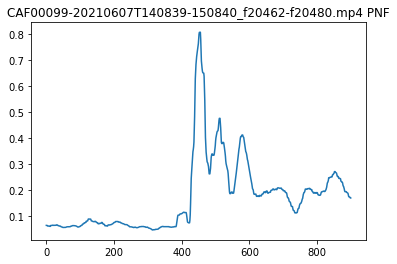

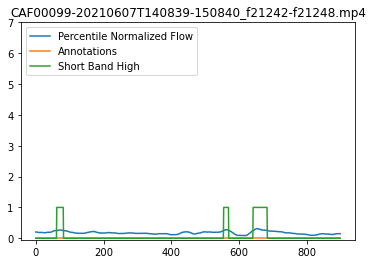

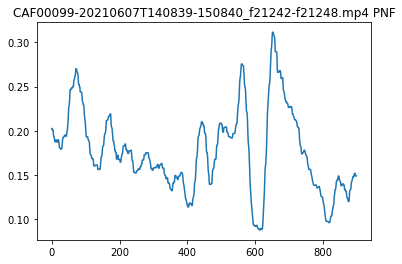

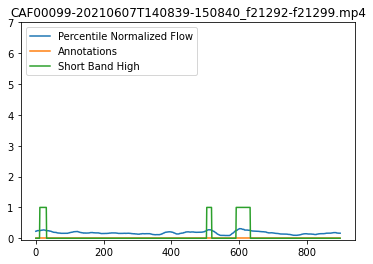

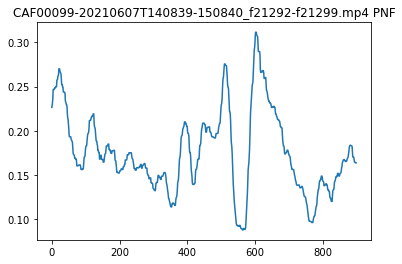

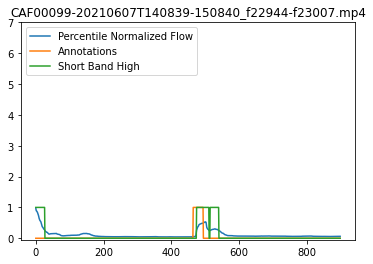

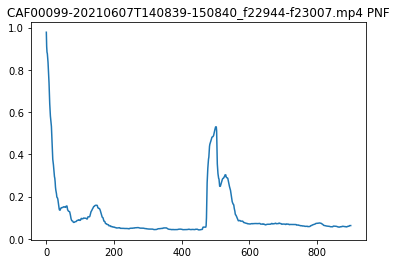

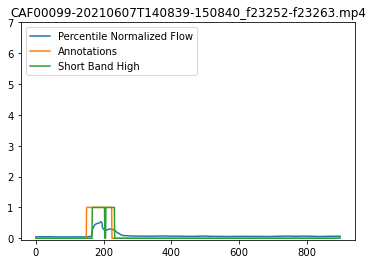

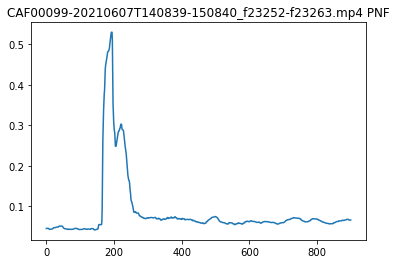

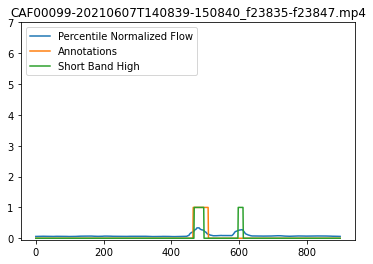

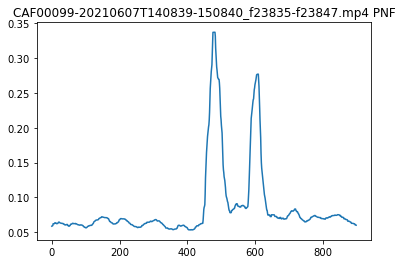

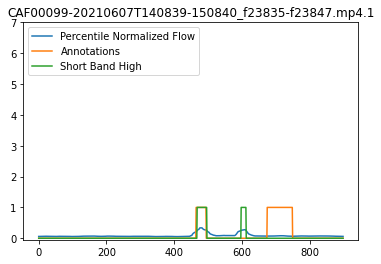

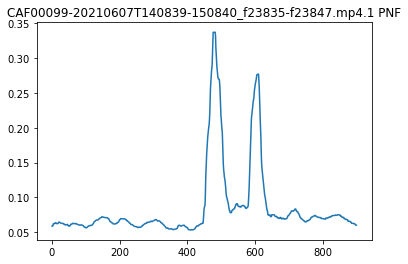

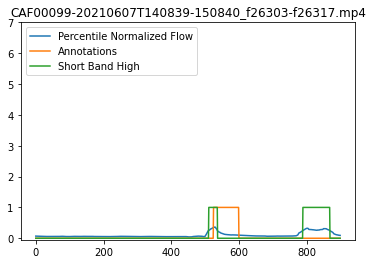

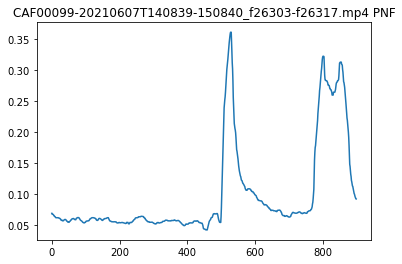

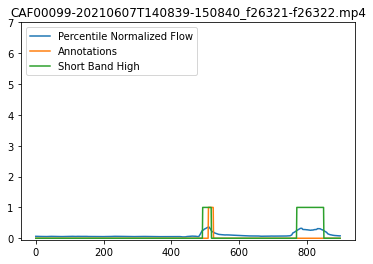

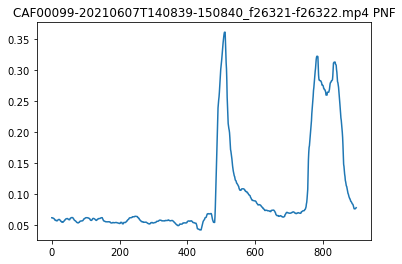

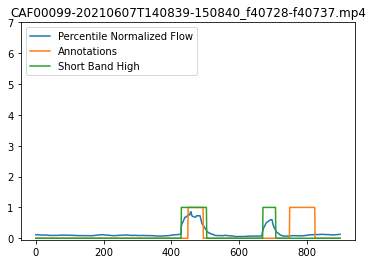

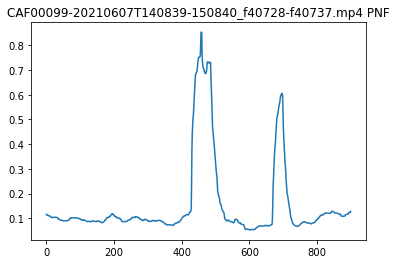

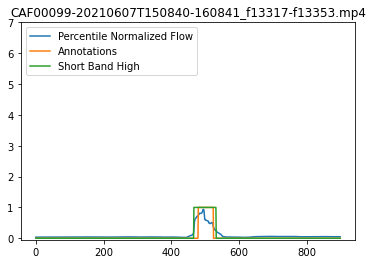

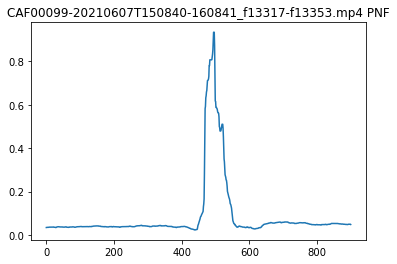

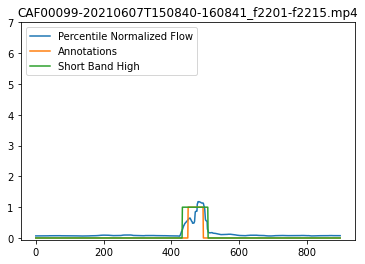

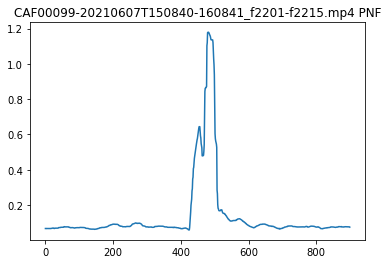

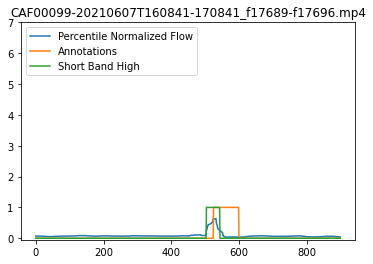

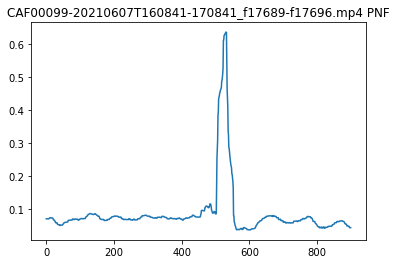

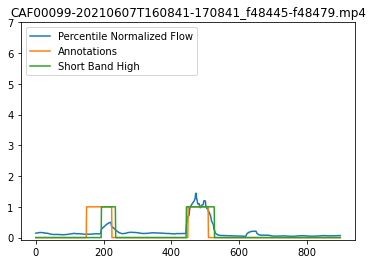

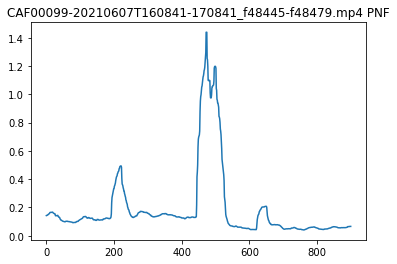

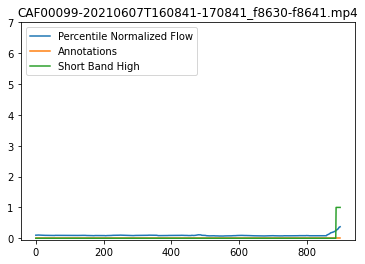

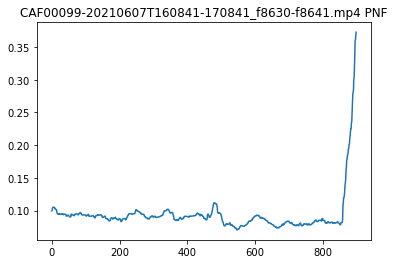

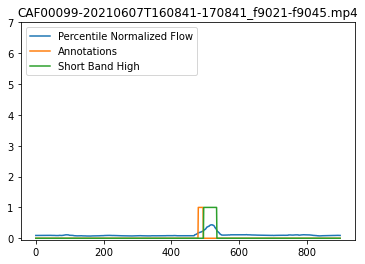

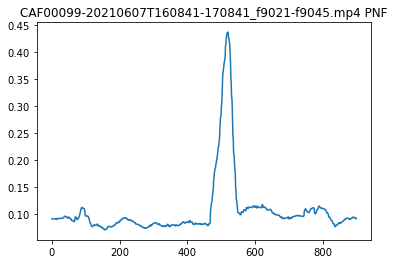

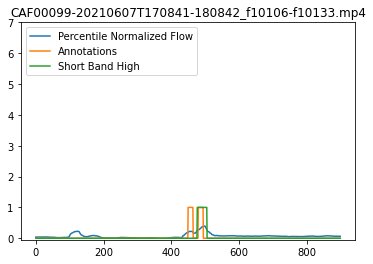

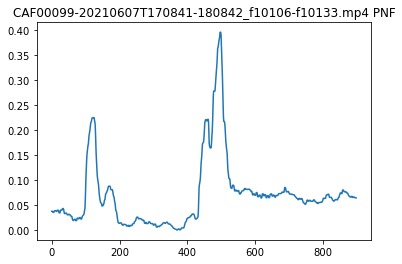

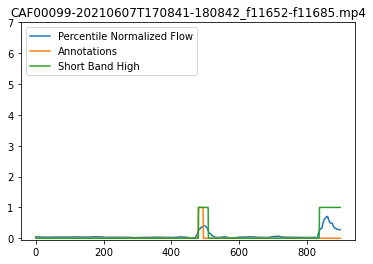

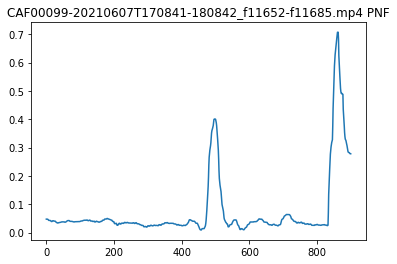

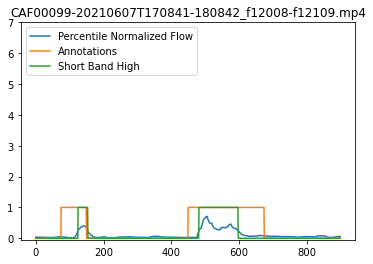

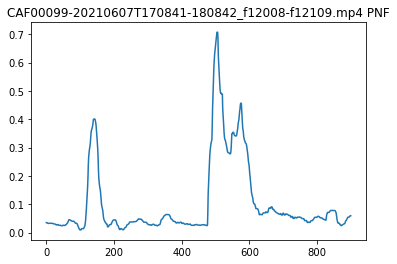

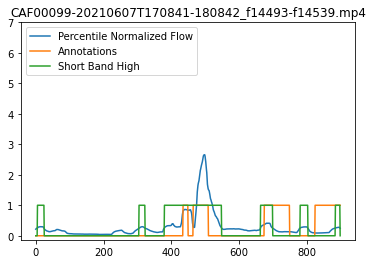

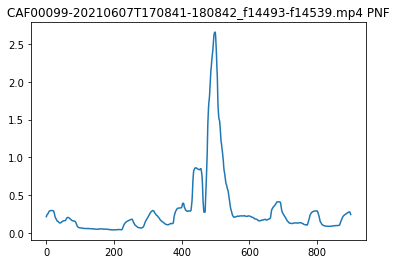

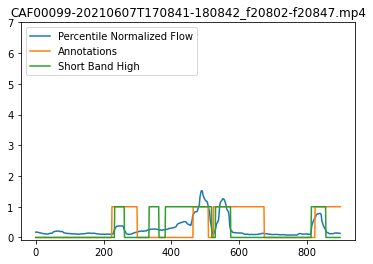

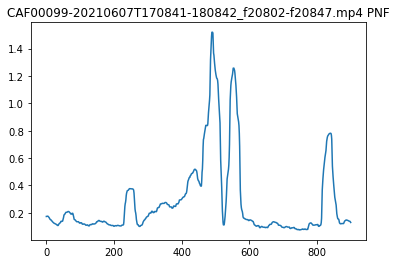

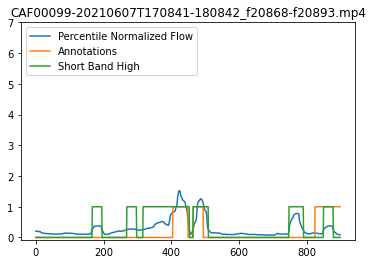

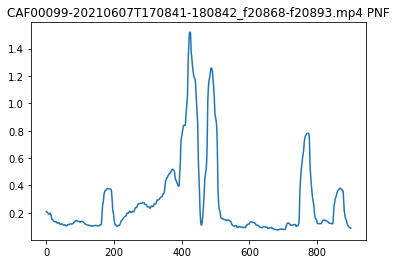

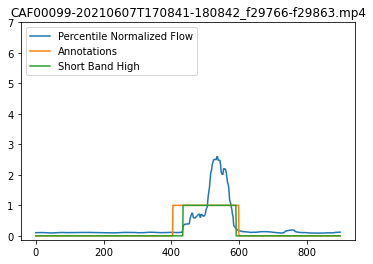

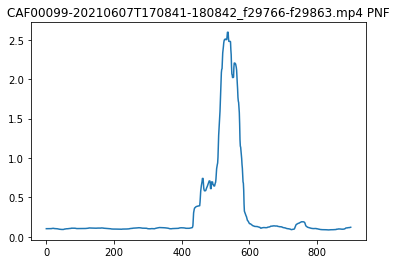

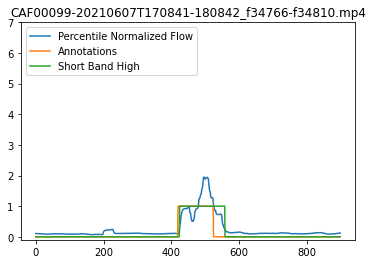

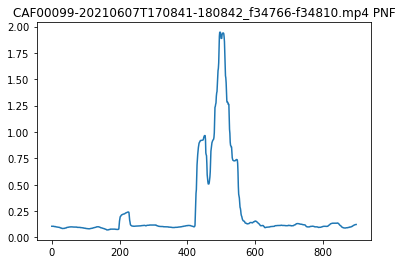

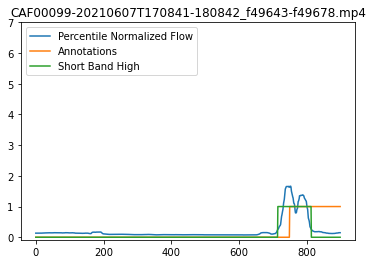

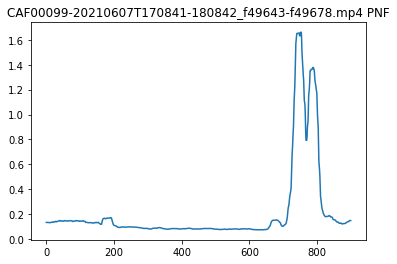

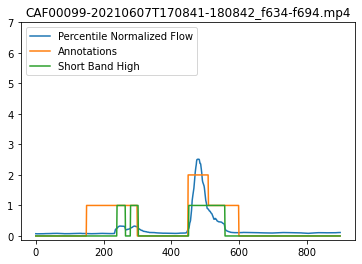

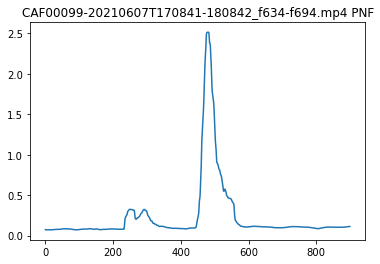

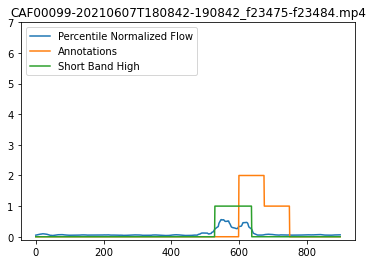

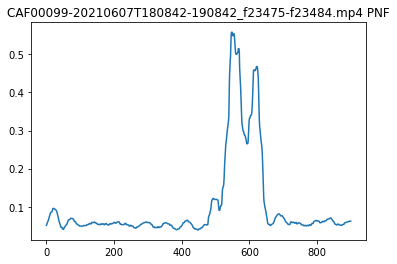

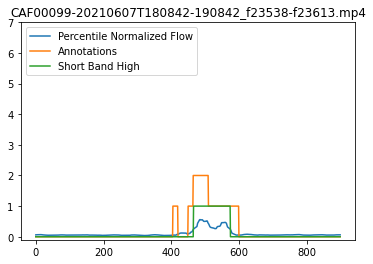

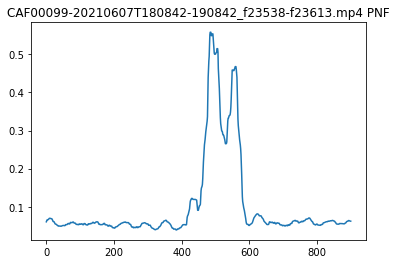

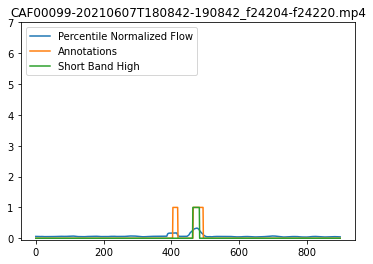

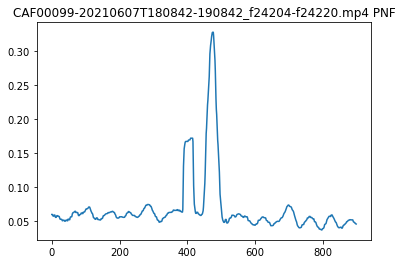

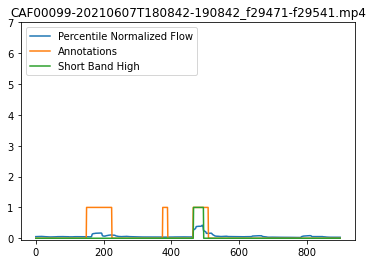

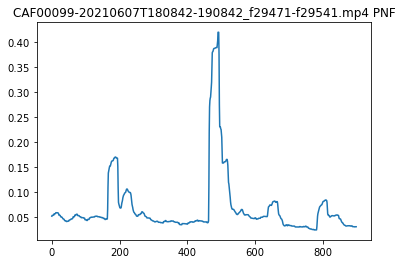

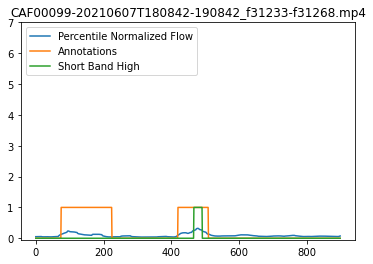

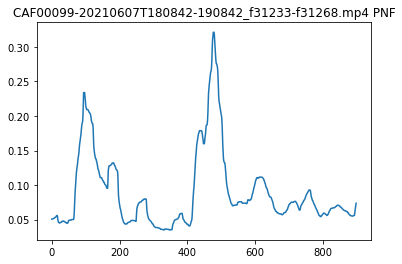

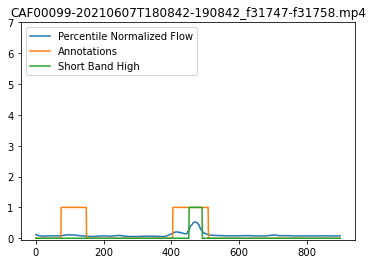

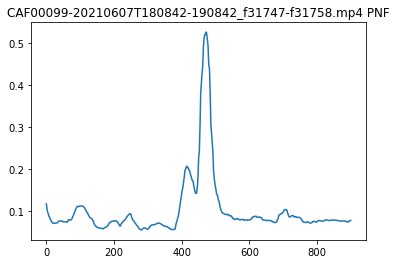

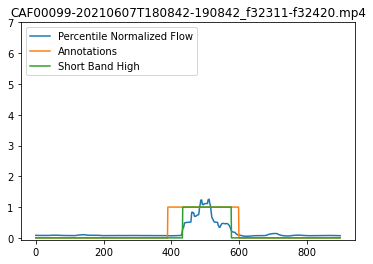

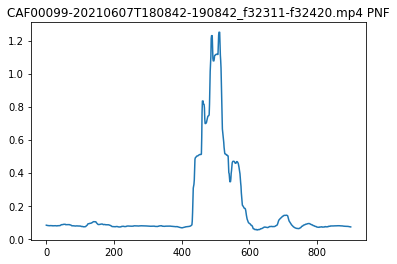

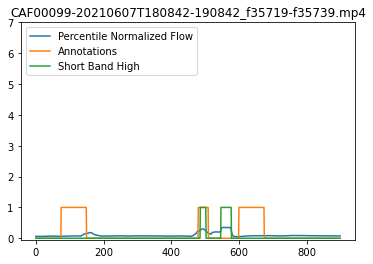

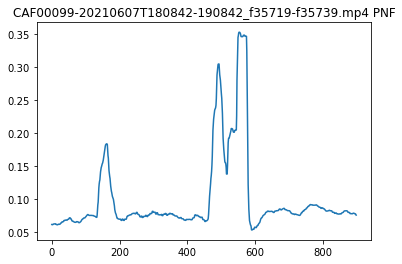

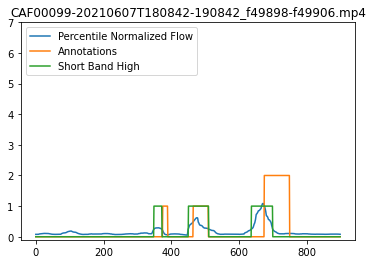

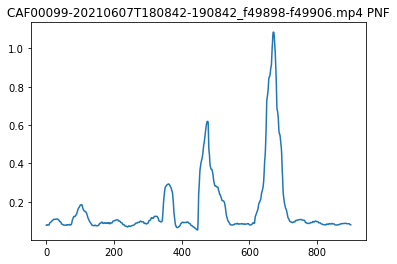

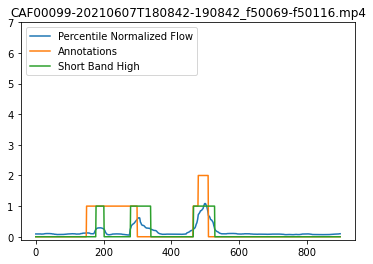

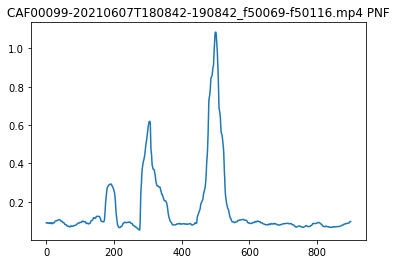

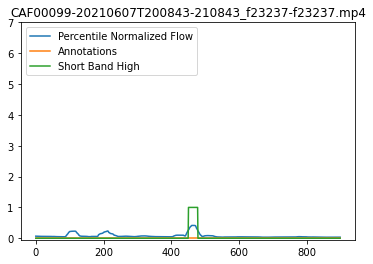

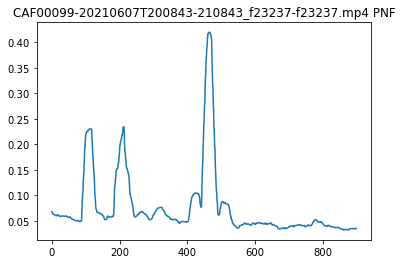

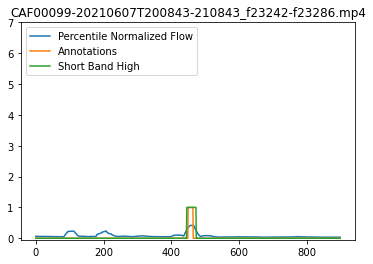

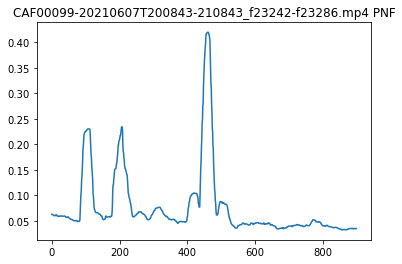

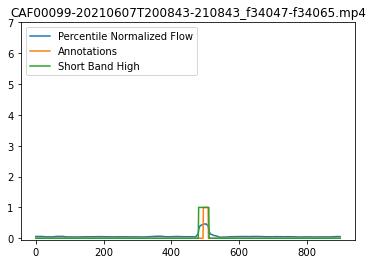

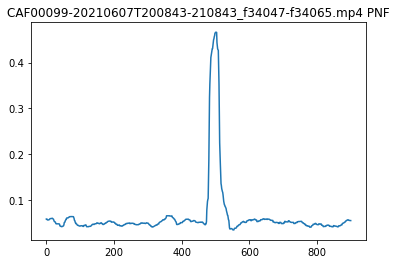

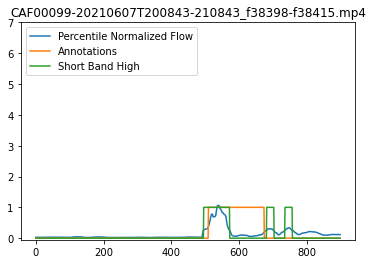

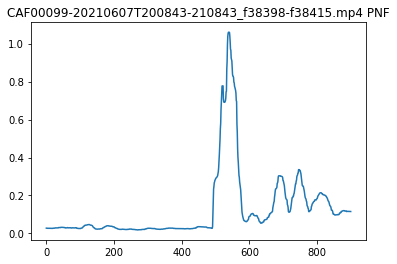

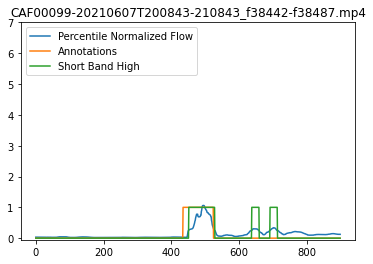

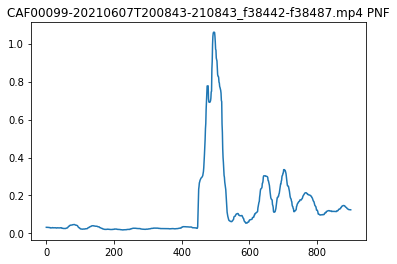

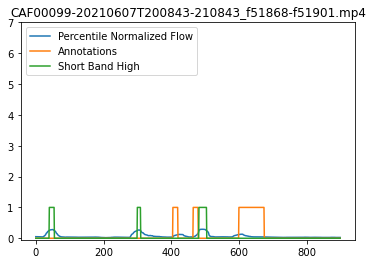

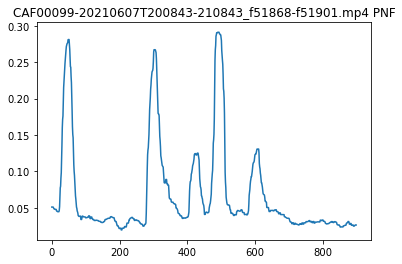

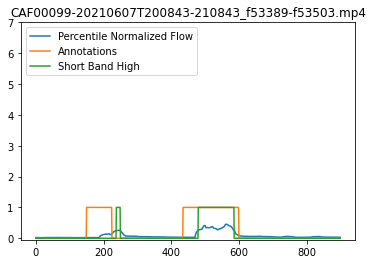

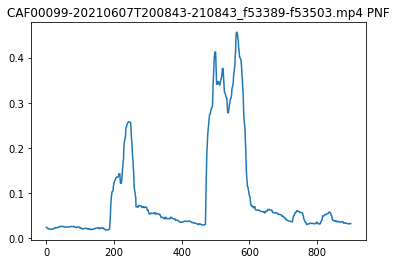

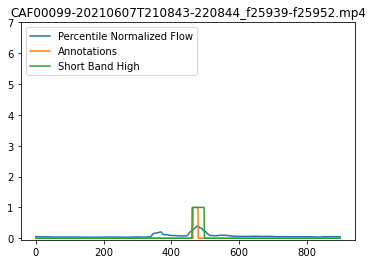

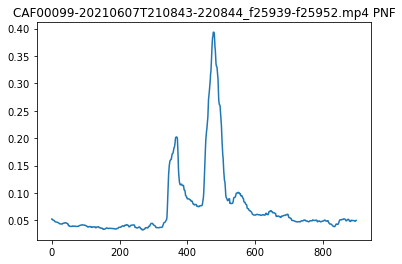

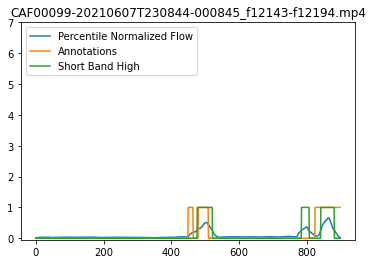

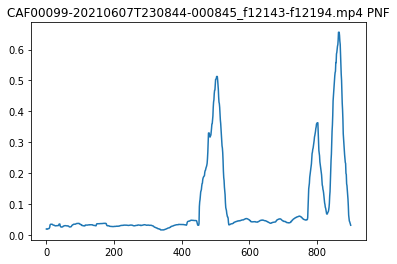

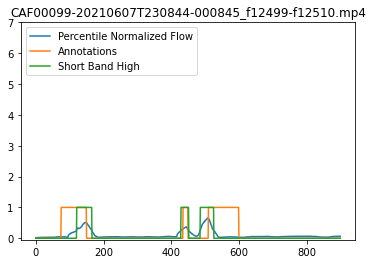

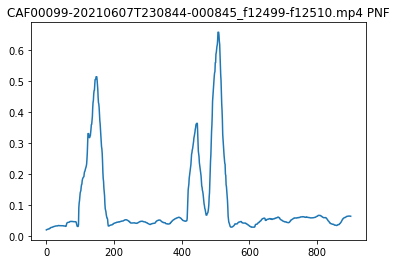

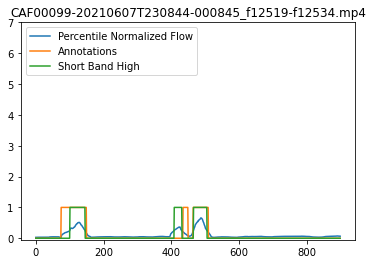

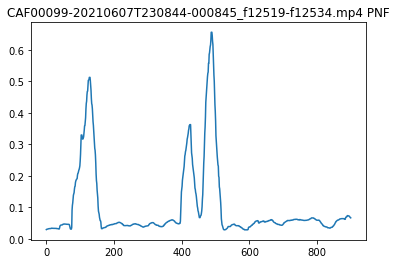

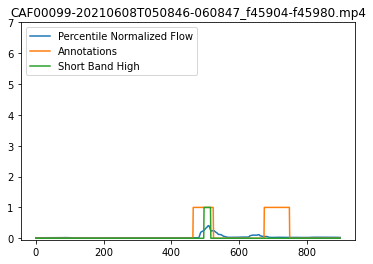

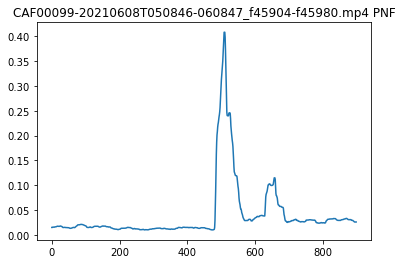

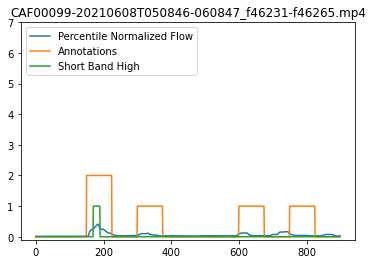

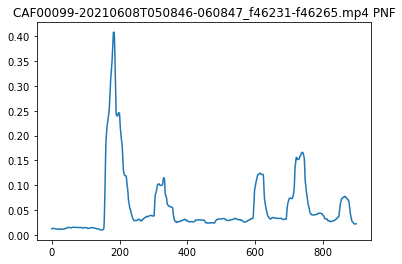

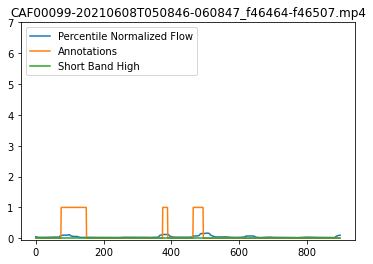

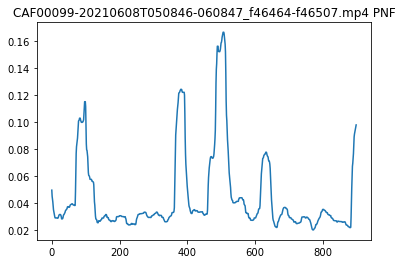

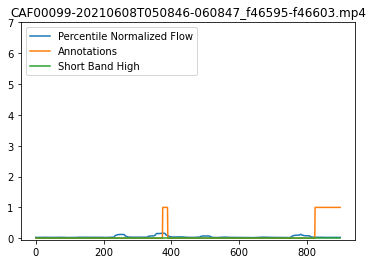

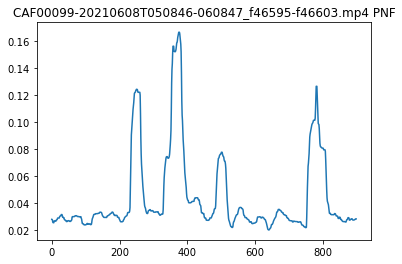

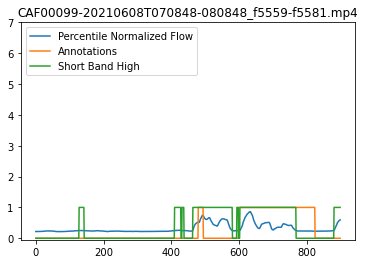

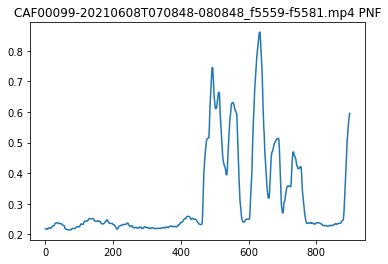

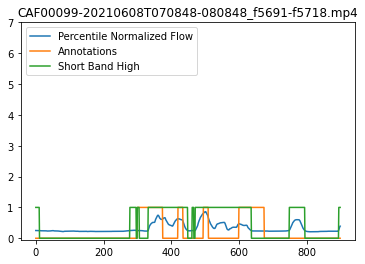

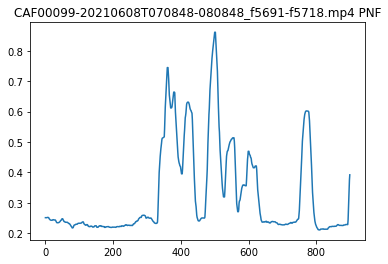

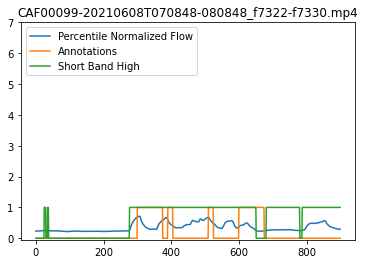

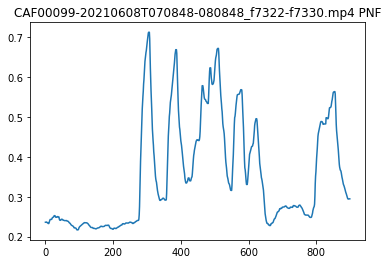

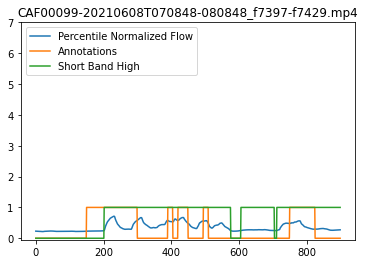

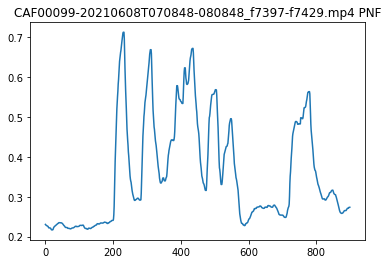

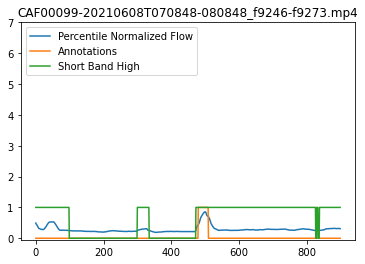

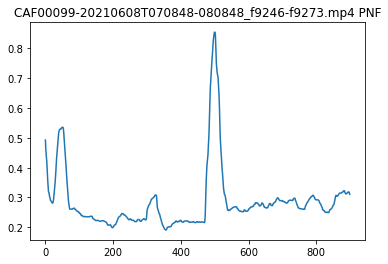

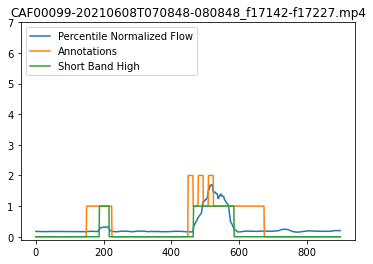

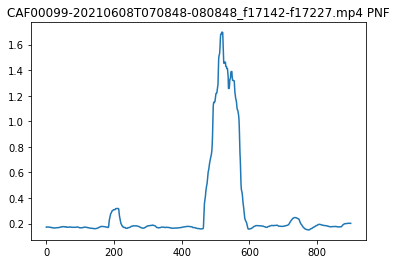

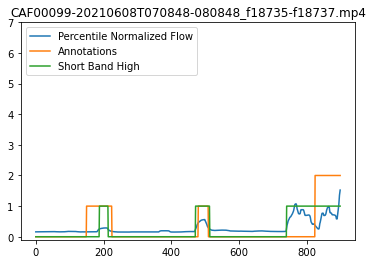

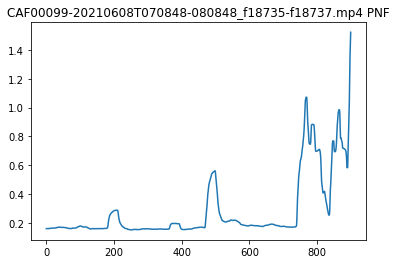

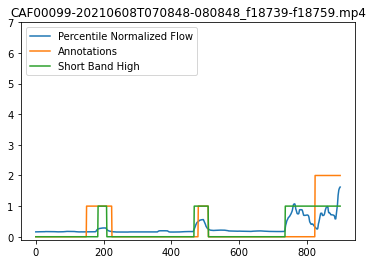

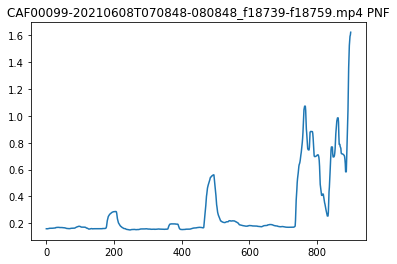

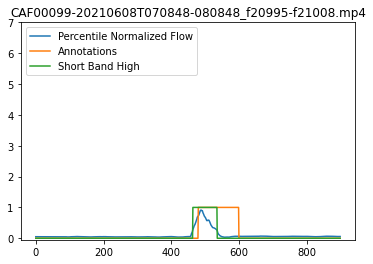

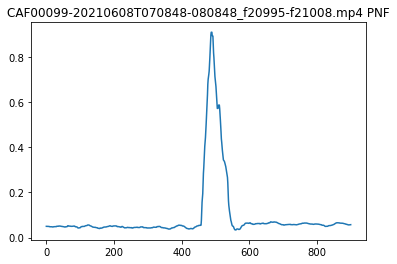

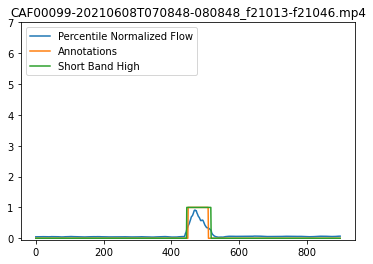

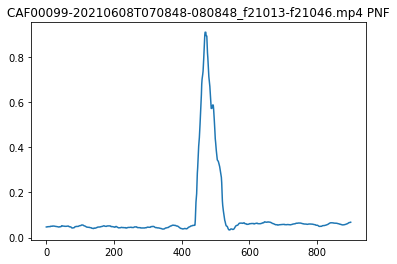

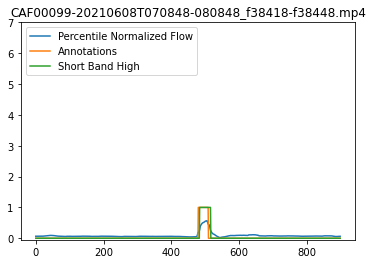

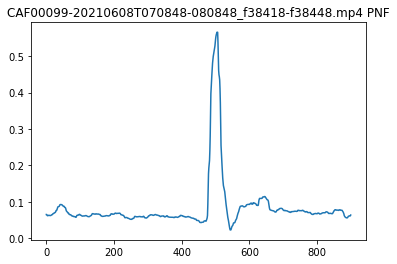

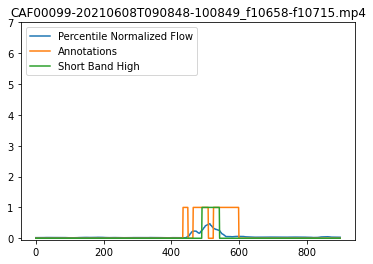

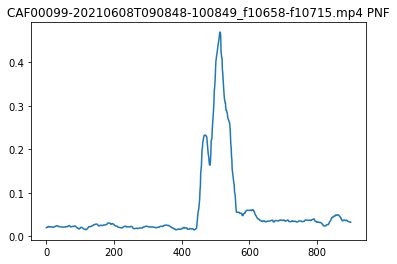

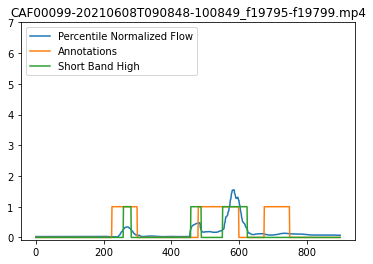

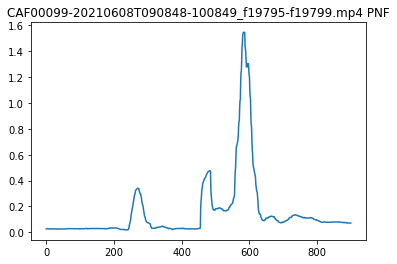

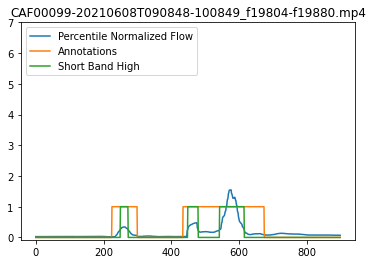

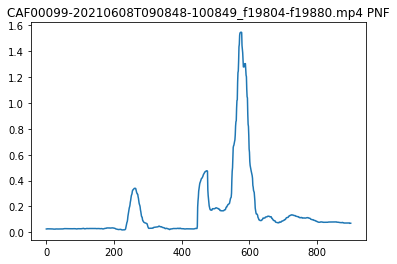

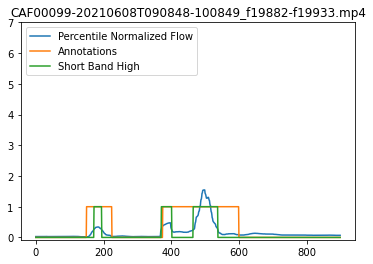

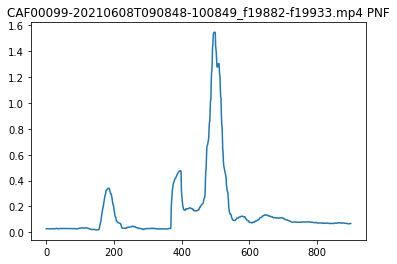

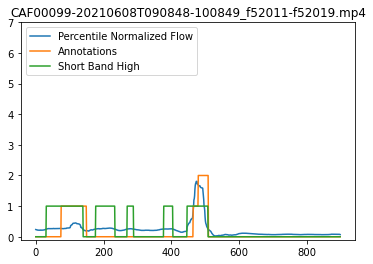

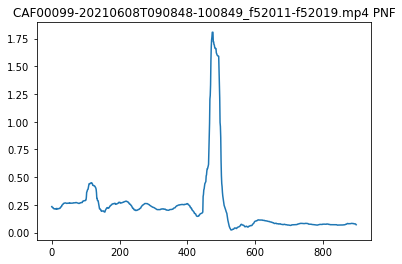

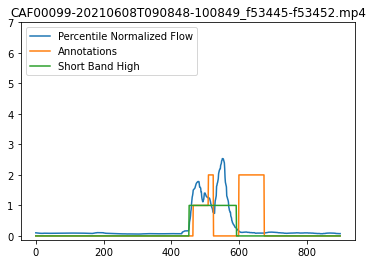

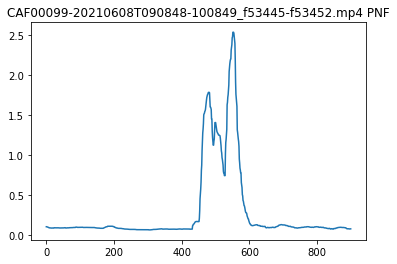

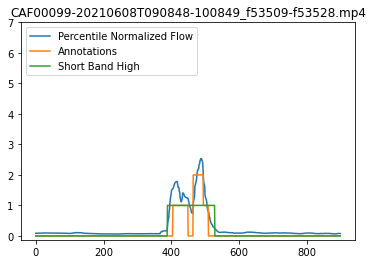

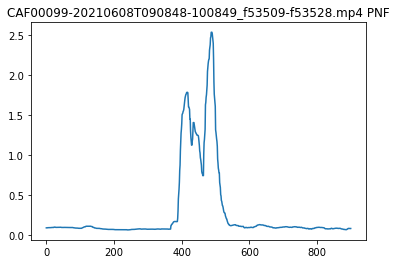

In [1381]:
for i, unique_video in enumerate(np.unique(video_names)):
    flow, ant, shortb, videos = combo_antof(adjust_df, ant99_df, unique_video)
    
    for j in range(len(flow)):
        x = range(len(flow[j]))
        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.plot(x, ant[j], label = "Annotations")
        plt.plot(x, shortb[j], label = "Short Band High ")
        plt.title(videos[j])
        ax = plt.gca()
        ax.set_ylim(top = 7)
        plt.legend(loc="upper left")
        
        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.title(videos[j] + " PNF")
    plt.show()

In [1338]:
#sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, adjust_df, ant99_df)
    print(sens_calc(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))
print(verify_sens(videos_ant, videos_shortb))

0.5580246913580247
0.7233115468409586
0.5951951951951951
0.2549019607843137
1.0
0.4266666666666667
0.4444444444444444
0.22507645259938838
0.30158730158730157
0.5333333333333333
0.3333333333333333
0.024806201550387597
0.5411764705882353
0.33406593406593404
0.18933333333333333


In [1339]:
#sensitivity for individual flickers
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, adjust_df, ant99_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        print(verify_sens(flicker_ant[k], flicker_shortb[k]))

CAF00099-20210607T110838-120839_f19879-f19987.mp4
0.5416666666666666
CAF00099-20210607T110838-120839_f22071-f22092.mp4
0.6933333333333334
CAF00099-20210607T110838-120839_f26501-f26512.mp4
0.4888888888888889
CAF00099-20210607T120839-130839_f10695-f10703.mp4
0.4266666666666667
CAF00099-20210607T120839-130839_f22023-f22039.mp4
0.5333333333333333
CAF00099-20210607T120839-130839_f26700-f26828.mp4
0.7111111111111111
CAF00099-20210607T120839-130839_f27942-f27951.mp4
0.8444444444444444
CAF00099-20210607T120839-130839_f30450-f30461.mp4
0.6956521739130435
CAF00099-20210607T120839-130839_f30690-f30743.mp4
1.0
CAF00099-20210607T120839-130839_f30772-f30774.mp4
1.0
CAF00099-20210607T120839-130839_f38921-f39041.mp4
0.8063492063492064
CAF00099-20210607T120839-130839_f39067-f39134.mp4
0.7087719298245614
CAF00099-20210607T120839-130839_f42562-f42568.mp4
-1.0
CAF00099-20210607T120839-130839_f46987-f46994.mp4
0.28444444444444444
CAF00099-20210607T120839-130839_f52792-f52829.mp4
1.0
CAF00099-20210607T12083

In [1335]:
#overlap sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, adjust_df, ant99_df)
    print(overlap_sens(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))

0.8049382716049382
0.9132897603485839
0.9465465465465466
0.5470588235294118
0.9777777777777777
0.92
0.8566666666666667
0.5908256880733945
0.7063492063492064
0.9333333333333333
0.9149425287356322
0.2062015503875969
0.8605042016806723
0.6527472527472528


In [1327]:
#overlap sensitivity for individual flickers
values = []
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, adjust_df, ant99_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        sens = overlap_sens(flicker_ant[k], flicker_shortb[k])
        print(sens)
        values.append(sens)

CAF00099-20210607T110838-120839_f19879-f19987.mp4
0.9916666666666667
CAF00099-20210607T110838-120839_f22071-f22092.mp4
0.9866666666666667
CAF00099-20210607T110838-120839_f26501-f26512.mp4
0.9777777777777777
CAF00099-20210607T120839-130839_f10695-f10703.mp4
0.9866666666666667
CAF00099-20210607T120839-130839_f22023-f22039.mp4
0.9833333333333333
CAF00099-20210607T120839-130839_f26700-f26828.mp4
0.9936507936507937
CAF00099-20210607T120839-130839_f27942-f27951.mp4
0.9555555555555556
CAF00099-20210607T120839-130839_f30450-f30461.mp4
0.9942028985507246
CAF00099-20210607T120839-130839_f30690-f30743.mp4
0.9911111111111112
CAF00099-20210607T120839-130839_f30772-f30774.mp4
0.9916666666666667
CAF00099-20210607T120839-130839_f38921-f39041.mp4
0.9936507936507937
CAF00099-20210607T120839-130839_f39067-f39134.mp4
0.9929824561403509
CAF00099-20210607T120839-130839_f42562-f42568.mp4
None
CAF00099-20210607T120839-130839_f46987-f46994.mp4
0.9866666666666667
CAF00099-20210607T120839-130839_f52792-f52829.mp

In [1336]:
#count zero, None + otherwise
print(values.count(0))
print(values.count(None))
count = 0
for i in range(len(values)):
    if values[i] != None and values[i] > 0:
        count = count + 1
print(count)

0
13
87


In [1340]:
#specificity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, adjust_df, ant99_df)
    print(spec_calc(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))

0.8225925925925925
0.7446153846153846
0.7636666666666667
0.9514074074074074
0.9283333333333333
0.9180555555555555
0.7582222222222222
0.8046666666666666
0.8941269841269841
0.9788888888888889
0.8214814814814815
0.8208333333333333
0.7205050505050505
0.7541269841269841


In [1342]:
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, adjust_df, ant99_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        print(spec_calc(flicker_ant[k], flicker_shortb[k]))

CAF00099-20210607T110838-120839_f19879-f19987.mp4
0.6944444444444444
CAF00099-20210607T110838-120839_f22071-f22092.mp4
0.9166666666666666
CAF00099-20210607T110838-120839_f26501-f26512.mp4
0.8566666666666667
CAF00099-20210607T120839-130839_f10695-f10703.mp4
0.9166666666666666
CAF00099-20210607T120839-130839_f22023-f22039.mp4
0.7822222222222223
CAF00099-20210607T120839-130839_f26700-f26828.mp4
0.46444444444444444
CAF00099-20210607T120839-130839_f27942-f27951.mp4
0.8988888888888888
CAF00099-20210607T120839-130839_f30450-f30461.mp4
0.5155555555555555
CAF00099-20210607T120839-130839_f30690-f30743.mp4
0.6322222222222222
CAF00099-20210607T120839-130839_f30772-f30774.mp4
0.6322222222222222
CAF00099-20210607T120839-130839_f38921-f39041.mp4
0.6433333333333333
CAF00099-20210607T120839-130839_f39067-f39134.mp4
0.6188888888888889
CAF00099-20210607T120839-130839_f42562-f42568.mp4
1.0
CAF00099-20210607T120839-130839_f46987-f46994.mp4
0.7411111111111112
CAF00099-20210607T120839-130839_f52792-f52829.mp